In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from scipy.stats import boxcox

from imp import load_source

from sklearn.decomposition import PCA

query_strings = load_source('query_strings', '../stats_generation/query_strings.py' )
gps = load_source(  'generate_player_stats', '../stats_generation/generate_player_stats.py' )

In [2]:
%matplotlib inline
plt.style.use('dark_background')
from pylab import rcParams
rcParams['figure.figsize'] = 14, 10

In [10]:
reg_team_data = pd.DataFrame()

# Get all the team data
# Can id by team, week, year
for year in range( 2009, 2017 ):
    new_frame = gps.generate_stats( 'Team', year )
    new_frame['year'] = year
    reg_team_data = pd.concat( [reg_team_data, new_frame], ignore_index=True )
    
reg_team_data.head()

,team,week,def_fumb_forced,def_fumb_rec,def_frec_yds,def_frec_tds,def_fg_blk,def_xp_blk,def_punt_blk,def_int,...,def_tkl_loss_yds_avg,kickret_yds_avg,puntret_yds_avg,tds,score,opp_team,opp_score,home_flag,away_flag,year
0,ARI,1,0,1,0,0,0,0,0,0,...,0.0,20.666667,9.166667,1,16.0,SF,20.0,1,0,2009
1,ARI,2,4,2,18,0,1,0,0,1,...,0.0,25.500000,0.000000,4,31.0,JAC,17.0,0,1,2009
2,ARI,3,0,0,0,0,0,0,0,1,...,0.0,19.500000,2.166667,1,10.0,IND,31.0,1,0,2009
3,ARI,5,0,0,0,0,1,0,0,1,...,0.0,19.500000,0.285714,4,28.0,HOU,21.0,1,0,2009
4,ARI,6,1,1,0,0,0,0,0,1,...,0.0,17.000000,10.666667,3,27.0,SEA,3.0,0,1,2009


In [4]:
pre_team_data = pd.DataFrame()

# Get all the team data
# Can id by team, week, year
for year in range( 2009, 2017 ):
    new_frame = gps.generate_stats( 'Team', year, 'Preseason' )
    new_frame['year'] = year
    pre_team_data = pd.concat( [pre_team_data, new_frame], ignore_index=True )
   
pre_team_data['week'] = pre_team_data['week']-4
pre_team_data.head()

,team,week,def_fumb_forced,def_fumb_rec,def_frec_yds,def_frec_tds,def_fg_blk,def_xp_blk,def_punt_blk,def_int,...,def_tkl_loss_yds_avg,kickret_yds_avg,puntret_yds_avg,tds,score,opp_team,opp_score,home_flag,away_flag,year
0,ARI,-3,0,0,0,0,0,0,0,0,...,0.0,26.80,5.666667,1,10.0,PIT,20.0,0,1,2009
1,ARI,-2,1,0,0,0,0,0,0,0,...,0.0,46.25,2.333333,0,6.0,SD,17.0,1,0,2009
2,ARI,-1,0,0,0,0,0,0,0,0,...,0.0,18.25,2.000000,5,37.0,GB,44.0,1,0,2009
3,ARI,0,0,0,0,0,0,0,0,1,...,0.0,32.00,1.000000,0,0.0,DEN,19.0,0,1,2009
4,ATL,-3,0,0,0,0,0,0,0,1,...,0.0,15.20,8.833333,3,26.0,DET,27.0,0,1,2009


In [11]:
all_team_data = reg_team_data

In [6]:
pre_team_data['week'].unique()

array([-3, -2, -1,  0, -4])

In [4]:
all_team_data.shape

(4096, 81)

In [30]:
# Null values are all due to events not occuring
# No kickoffs or punt returns
# No defensive tackle losses
# No missed field goals
all_team_data.isnull().sum().sort_values( ascending=False ).head()

fg_miss_yds_min         2994
kickret_yds_avg          374
def_tkl_loss_yds_avg      60
puntret_yds_avg            7
year                       0
dtype: int64

In [48]:
lumped_year_team_data = all_team_data.groupby( ['team','year'] ).sum()

In [12]:
all_team_data[ def_cols ].corr()

,def_fumb_forced,def_fumb_rec,def_frec_yds,def_frec_tds,def_fg_blk,def_xp_blk,def_punt_blk,def_int,def_int_yds,def_int_tds,...,def_pass_def,def_qbhit,def_sack,def_sack_yds,def_safety,def_tkl,def_tkl_contributers,def_tkl_loss,def_tkl_loss_yds,def_tkl_loss_yds_avg
def_fumb_forced,1.000000,0.670567,0.245270,0.186681,-0.025758,0.021582,0.010986,0.054154,0.055762,0.038500,...,0.068883,0.034592,0.188727,-0.168754,0.014571,-0.003268,0.090518,0.032756,-0.010316,-0.010252
def_fumb_rec,0.670567,1.000000,0.359653,0.290652,-0.009703,0.019238,0.006206,0.054729,0.050951,0.029690,...,0.076322,0.015028,0.092385,-0.082908,-0.008097,0.006205,0.017909,-0.045250,-0.019229,-0.003148
def_frec_yds,0.245270,0.359653,1.000000,0.560752,-0.005720,-0.006061,0.055639,-0.009878,0.013202,0.004280,...,0.001455,0.036510,0.019645,-0.038629,-0.012200,0.008513,0.059841,-0.027340,0.005854,0.009958
def_frec_tds,0.186681,0.290652,0.560752,1.000000,-0.008491,0.019333,0.027865,0.027146,0.031818,0.030573,...,0.016304,0.031717,0.043203,-0.051934,-0.017248,-0.007437,0.025903,-0.002716,-0.011047,-0.006646
def_fg_blk,-0.025758,-0.009703,-0.005720,-0.008491,1.000000,0.000345,0.016649,-0.021564,-0.021297,-0.009140,...,-0.012739,-0.013255,-0.020857,0.033466,0.000491,-0.026908,0.077543,-0.023463,-0.020908,-0.007820
def_xp_blk,0.021582,0.019238,-0.006061,0.019333,0.000345,1.000000,-0.016337,-0.015477,-0.011757,-0.021599,...,-0.004734,-0.014464,-0.044659,0.032994,-0.016870,0.067561,0.003216,-0.028513,-0.026880,-0.020993
def_punt_blk,0.010986,0.006206,0.055639,0.027865,0.016649,-0.016337,1.000000,0.002514,0.006660,-0.002112,...,0.014883,-0.011423,0.020488,-0.002957,0.061155,-0.012147,0.025191,0.043798,0.086890,0.085725
def_int,0.054154,0.054729,-0.009878,0.027146,-0.021564,-0.015477,0.002514,1.000000,0.659743,0.401612,...,0.514946,0.101398,0.055652,-0.062307,-0.000481,-0.013565,-0.003580,0.002090,-0.019949,-0.023119
def_int_yds,0.055762,0.050951,0.013202,0.031818,-0.021297,-0.011757,0.006660,0.659743,1.000000,0.655729,...,0.368141,0.107029,0.066276,-0.063163,0.017302,-0.018084,0.042369,-0.012710,0.028114,0.027495
def_int_tds,0.038500,0.029690,0.004280,0.030573,-0.009140,-0.021599,-0.002112,0.401612,0.655729,1.000000,...,0.226625,0.080921,0.066067,-0.070068,-0.003159,-0.011761,0.029061,0.008711,0.044432,0.038278


In [10]:
all_team_data.columns.values

array([u'team', u'week', u'def_fumb_forced', u'def_fumb_rec',
       u'def_frec_yds', u'def_frec_tds', u'def_fg_blk', u'def_xp_blk',
       u'def_punt_blk', u'def_int', u'def_int_yds', u'def_int_tds',
       u'def_misc_yds', u'def_misc_tds', u'def_pass_def', u'def_qbhit',
       u'def_sack', u'def_sack_yds', u'def_safety', u'def_tkl',
       u'def_tkl_contributers', u'def_tkl_loss', u'def_tkl_loss_yds',
       u'off_fumb_forced', u'off_fumb_unforced', u'off_fumb_lost',
       u'off_fumb_rec', u'off_fumb_rec_tds', u'punts', u'punt_yds',
       u'punt_blk', u'punt_rets', u'punt_ret_yds', u'punt_ret_tds',
       u'kickoffs', u'kickoff_all_yds', u'kickoff_in_20',
       u'kickoff_own_recovery', u'kickoff_own_recovery_tds',
       u'kickoff_touchback', u'fg_att', u'fg_blk', u'fg_made', u'fg_miss',
       u'fg_yds', u'fg_yds_max', u'fg_miss_yds', u'fg_miss_yds_min',
       u'xp_att', u'xp_blk', u'xp_made', u'xp_miss', u'kickrets',
       u'kickret_yds', u'kickret_tds', u'kickret_touchback', 

In [24]:
def_cols = [ 'def_fumb_forced', u'def_fumb_rec',
       u'def_frec_yds', u'def_frec_tds', u'def_fg_blk', u'def_xp_blk',
       u'def_punt_blk', u'def_int', u'def_int_yds', u'def_int_tds',
       u'def_misc_yds', u'def_misc_tds', u'def_pass_def', u'def_qbhit',
       u'def_sack', u'def_sack_yds', u'def_safety', u'def_tkl',
       u'def_tkl_contributers', u'def_tkl_loss', u'def_tkl_loss_yds','def_tkl_loss_yds_avg'] 

pos_pred = ['opp_score','score']

In [31]:
all_team_data[ pos_pred+def_cols ].corr( method='spearman' ).sort_values( ['opp_score'] )

,opp_score,score,def_fumb_forced,def_fumb_rec,def_frec_yds,def_frec_tds,def_fg_blk,def_xp_blk,def_punt_blk,def_int,...,def_pass_def,def_qbhit,def_sack,def_sack_yds,def_safety,def_tkl,def_tkl_contributers,def_tkl_loss,def_tkl_loss_yds,def_tkl_loss_yds_avg
def_sack,-0.314723,0.169411,0.184602,0.110556,0.055237,0.061612,-0.010443,-0.035051,0.036656,0.079384,...,0.100626,0.607154,1.000000,-0.883642,0.085512,-0.051576,0.032201,0.545522,0.314444,0.217481
def_int,-0.305916,0.308611,0.056611,0.056489,0.053943,0.034902,-0.016008,-0.031795,-0.001166,1.000000,...,0.509022,0.139965,0.079384,-0.072298,0.008131,0.011625,-0.017412,0.002500,-0.023668,-0.008372
def_pass_def,-0.303273,0.289431,0.065019,0.068368,0.058259,0.055788,0.000377,-0.018615,0.004040,0.509022,...,1.000000,0.187860,0.100626,-0.111672,0.014895,0.007222,-0.030117,-0.000095,0.006957,0.018159
def_qbhit,-0.278731,0.192110,0.042510,0.014272,0.015031,0.026268,-0.010210,-0.004684,0.019334,0.139965,...,0.187860,1.000000,0.607154,-0.582042,0.050973,-0.047065,-0.018923,0.337085,0.252497,0.194555
def_int_yds,-0.231421,0.284495,0.058414,0.063084,0.064745,0.031453,-0.009753,-0.026938,0.008224,0.763459,...,0.399725,0.116101,0.078131,-0.066682,0.005290,0.003844,0.013671,0.007010,-0.008787,0.002226
def_tkl_loss,-0.161231,-0.000740,0.024551,-0.035904,-0.013979,0.002689,-0.010071,-0.038248,0.045402,0.002500,...,-0.000095,0.337085,0.545522,-0.480097,0.089962,0.035048,0.208315,1.000000,0.326856,0.034661
def_fumb_rec,-0.146296,0.168717,0.649306,1.000000,0.451281,0.270924,-0.018690,0.016792,-0.019092,0.056489,...,0.068368,0.014272,0.110556,-0.089352,-0.024676,0.020864,0.042599,-0.035904,-0.036745,-0.017300
def_fumb_forced,-0.142680,0.145161,1.000000,0.649306,0.334547,0.188653,-0.043948,0.016158,-0.005559,0.056611,...,0.065019,0.042510,0.184602,-0.161087,0.022438,0.019434,0.089861,0.024551,-0.017648,-0.015767
def_int_tds,-0.082352,0.248095,0.045378,0.048218,0.038872,0.038706,-0.014633,-0.020400,-0.000697,0.345957,...,0.200177,0.089078,0.063239,-0.058450,-0.001367,-0.000991,0.051344,0.020694,0.026403,0.021006
def_frec_yds,-0.081318,0.129989,0.334547,0.451281,1.000000,0.484439,-0.019127,0.019948,-0.019371,0.053943,...,0.058259,0.015031,0.055237,-0.059179,-0.026605,0.009599,0.033167,-0.013979,0.001669,0.007592


In [59]:
# Lots of correlation
# May chose to combine these
# Could potentially use PCA

tkl_stuff = [
                'def_sack','def_qbhit','def_pass_def','def_tkl','def_tkl_contributers',
                'def_tkl_loss','def_tkl_loss_yds','def_tkl_loss_yds_avg',
                'def_sack_yds'
            ]

print         all_team_data[tkl_stuff].corr( method='spearman' )
print lumped_year_team_data[tkl_stuff].corr( method='spearman' )

                      def_sack  def_qbhit  def_pass_def   def_tkl  \
def_sack              1.000000   0.607154      0.100626 -0.051576   
def_qbhit             0.607154   1.000000      0.187860 -0.047065   
def_pass_def          0.100626   0.187860      1.000000  0.007222   
def_tkl              -0.051576  -0.047065      0.007222  1.000000   
def_tkl_contributers  0.032201  -0.018923     -0.030117  0.385971   
def_tkl_loss          0.545522   0.337085     -0.000095  0.035048   
def_tkl_loss_yds      0.314444   0.252497      0.006957 -0.298953   
def_tkl_loss_yds_avg  0.217481   0.194555      0.018159 -0.332201   
def_sack_yds         -0.883642  -0.582042     -0.111672  0.038104   

                      def_tkl_contributers  def_tkl_loss  def_tkl_loss_yds  \
def_sack                          0.032201      0.545522          0.314444   
def_qbhit                        -0.018923      0.337085          0.252497   
def_pass_def                     -0.030117     -0.000095          0.006957 

In [54]:
# All the ways defense has to score is uncorrelated when grouped by team and year
# May chose to combine these

scored_stuff = ['def_int_tds','def_frec_tds','def_misc_tds','def_safety']
print lumped_year_team_data[scored_stuff].sum()
print lumped_year_team_data[scored_stuff].corr( method='spearman' )

def_int_tds     426
def_frec_tds    202
def_misc_tds     53
def_safety       96
dtype: int64
              def_int_tds  def_frec_tds  def_misc_tds  def_safety
def_int_tds      1.000000      0.119656      0.013840    0.040634
def_frec_tds     0.119656      1.000000     -0.004014   -0.000984
def_misc_tds     0.013840     -0.004014      1.000000   -0.012094
def_safety       0.040634     -0.000984     -0.012094    1.000000


In [55]:
# All the kicking blocks are uncorrelated
# May chose to combine these

blk_stuff = ['def_xp_blk','def_punt_blk','def_fg_blk',]

print all_team_data[blk_stuff].corr()

print lumped_year_team_data[blk_stuff].sum()
print lumped_year_team_data[blk_stuff].corr( method='spearman' )

              def_xp_blk  def_punt_blk  def_fg_blk
def_xp_blk      1.000000     -0.007470   -0.014749
def_punt_blk   -0.007470      1.000000    0.005674
def_fg_blk     -0.014749      0.005674    1.000000
def_xp_blk       62
def_punt_blk    106
def_fg_blk      164
dtype: int64
              def_xp_blk  def_punt_blk  def_fg_blk
def_xp_blk      1.000000     -0.045021    0.058342
def_punt_blk   -0.045021      1.000000   -0.016253
def_fg_blk      0.058342     -0.016253    1.000000


In [91]:
tkl_stuff = [u'def_pass_def', 
            u'def_qbhit', u'def_sack', u'def_sack_yds', 
            u'def_tkl', u'def_tkl_contributers', u'def_tkl_loss']

print all_team_data[tkl_stuff].corr()

print lumped_year_team_data[tkl_stuff].sum()
print lumped_year_team_data[tkl_stuff].corr( method='spearman' )

                      def_pass_def  def_qbhit  def_sack  def_sack_yds  \
def_pass_def              1.000000   0.189989  0.091659     -0.106570   
def_qbhit                 0.189989   1.000000  0.627087     -0.597619   
def_sack                  0.091659   0.627087  1.000000     -0.872518   
def_sack_yds             -0.106570  -0.597619 -0.872518      1.000000   
def_tkl                   0.000573  -0.060337 -0.071399      0.064895   
def_tkl_contributers     -0.021528  -0.018830  0.036649     -0.000480   
def_tkl_loss             -0.000721   0.350299  0.569685     -0.484449   

                       def_tkl  def_tkl_contributers  def_tkl_loss  
def_pass_def          0.000573             -0.021528     -0.000721  
def_qbhit            -0.060337             -0.018830      0.350299  
def_sack             -0.071399              0.036649      0.569685  
def_sack_yds          0.064895             -0.000480     -0.484449  
def_tkl               1.000000              0.422950      0.015771  
d

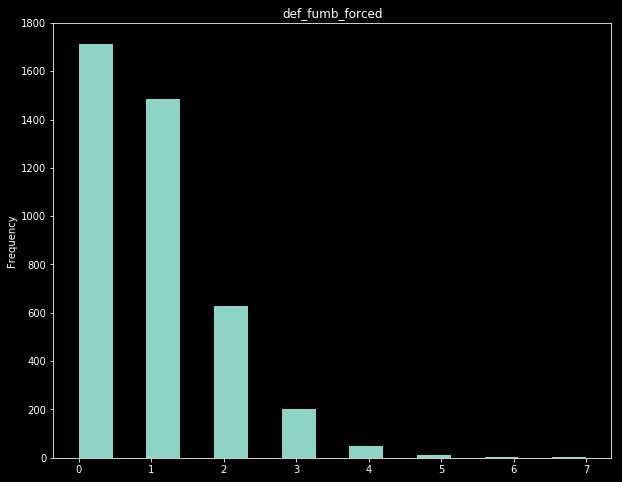

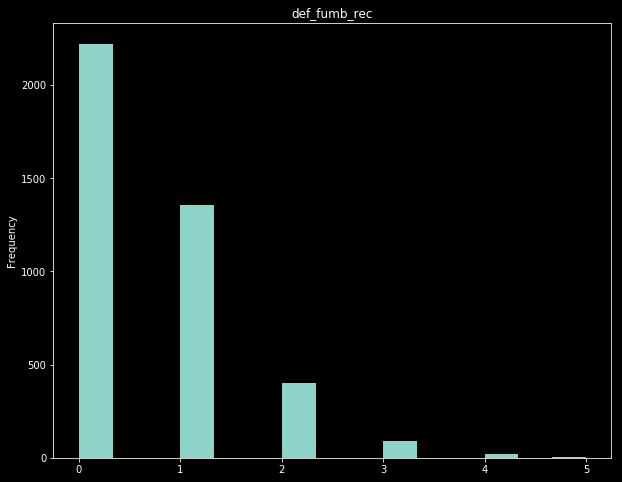

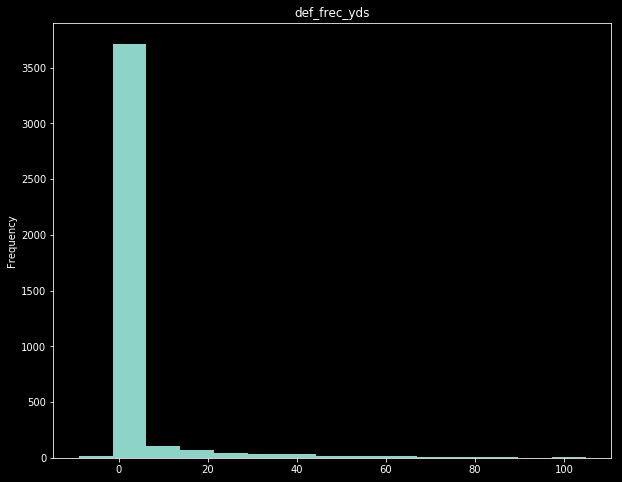

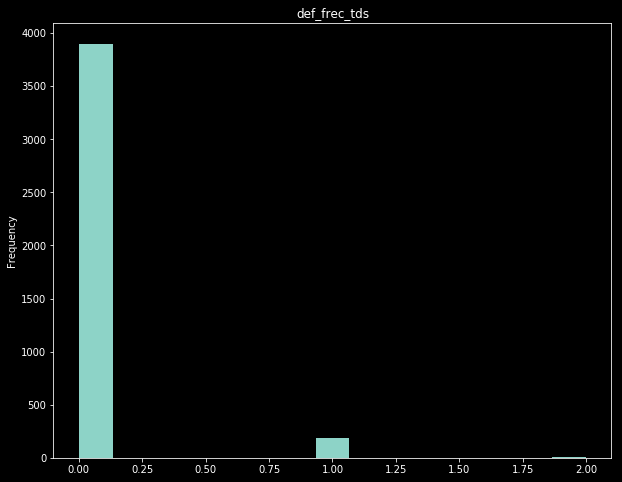

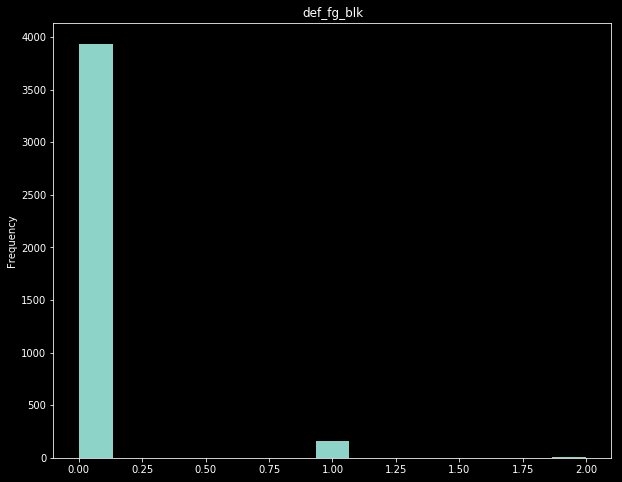

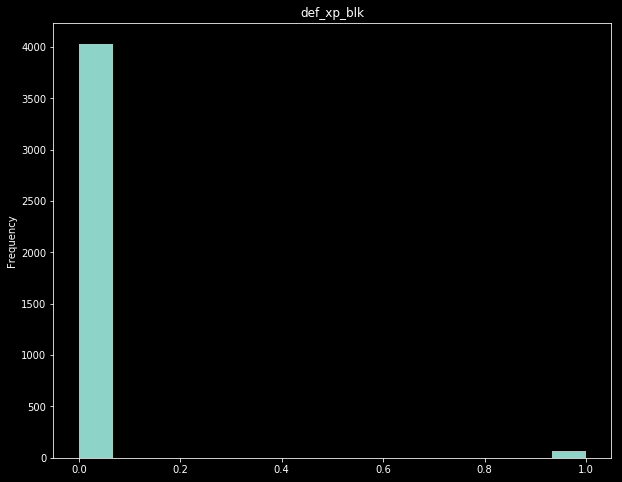

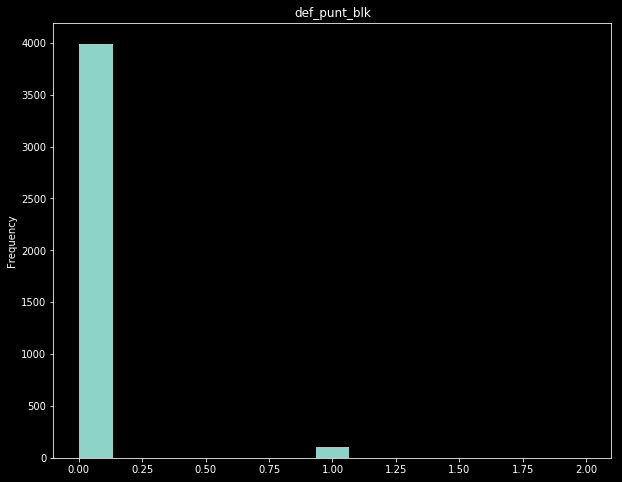

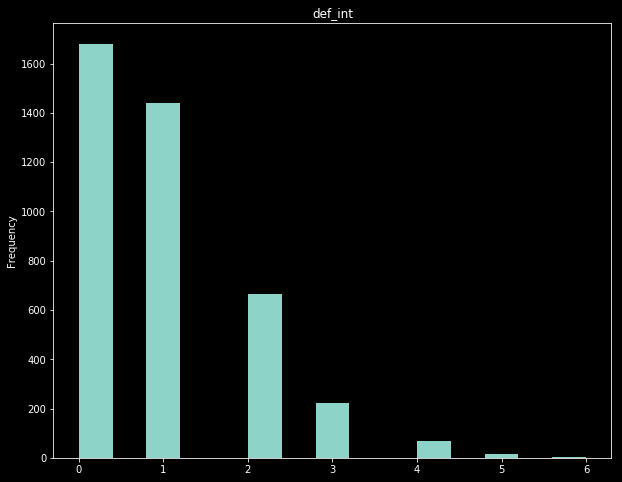

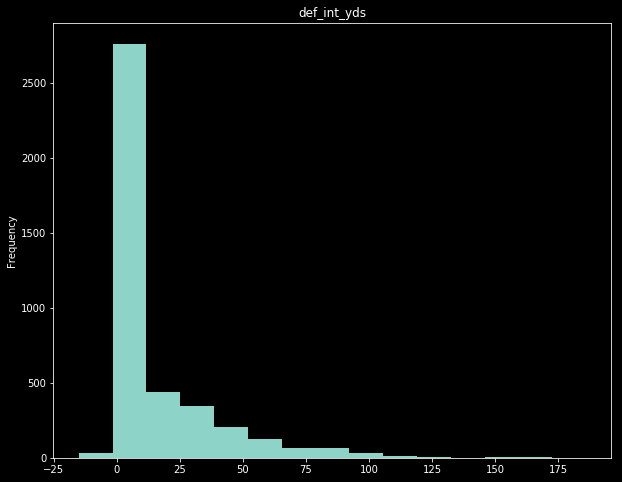

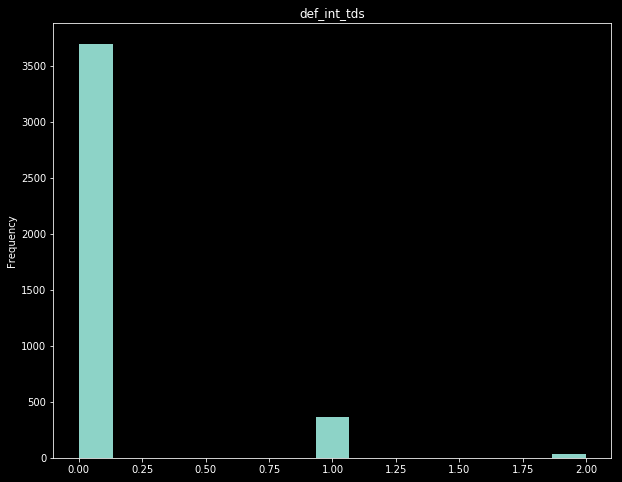

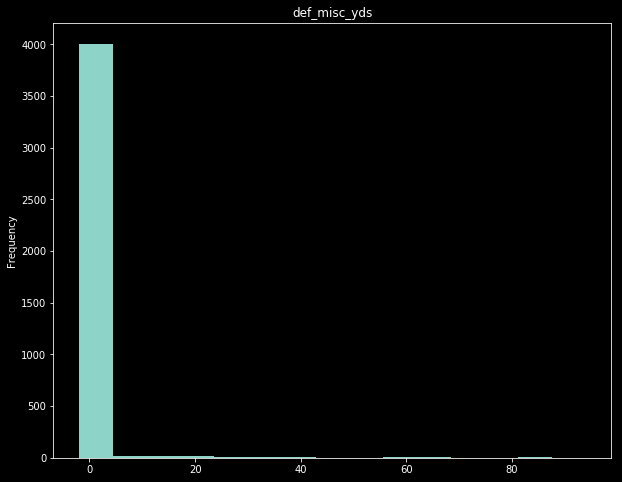

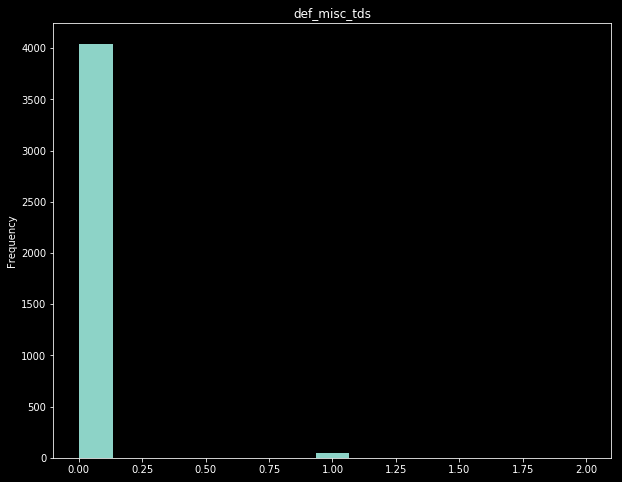

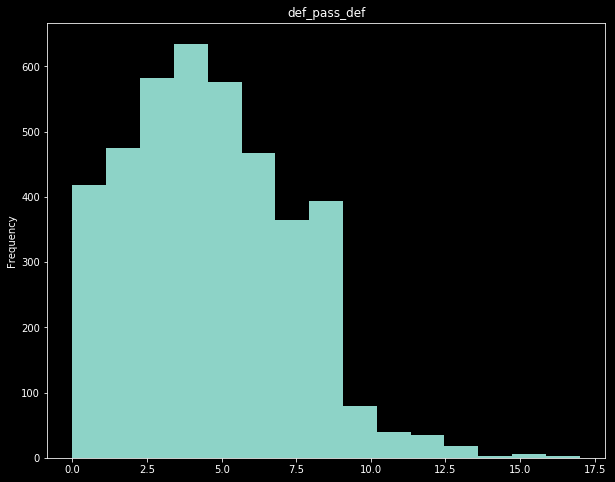

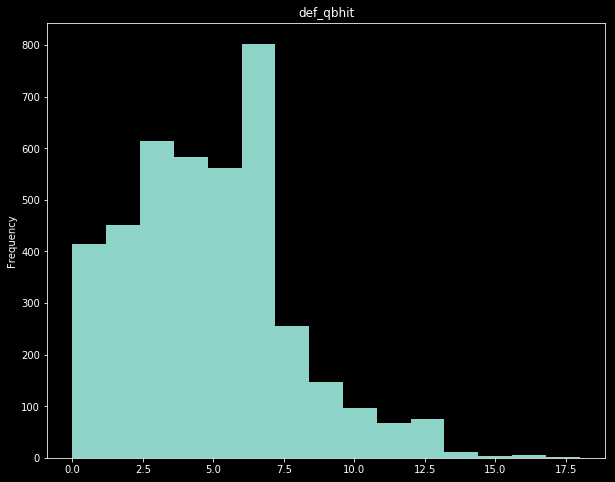

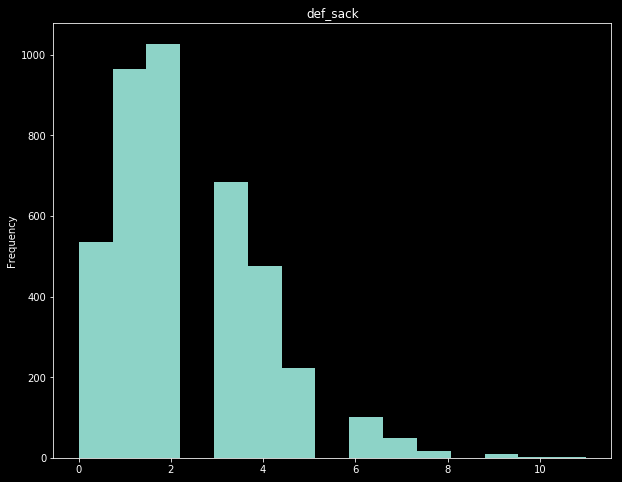

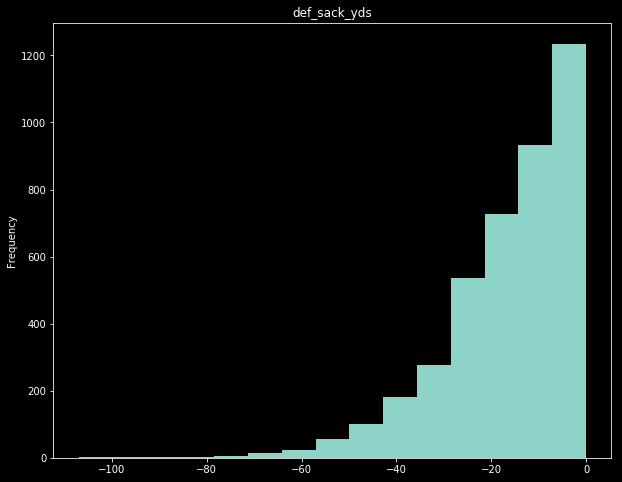

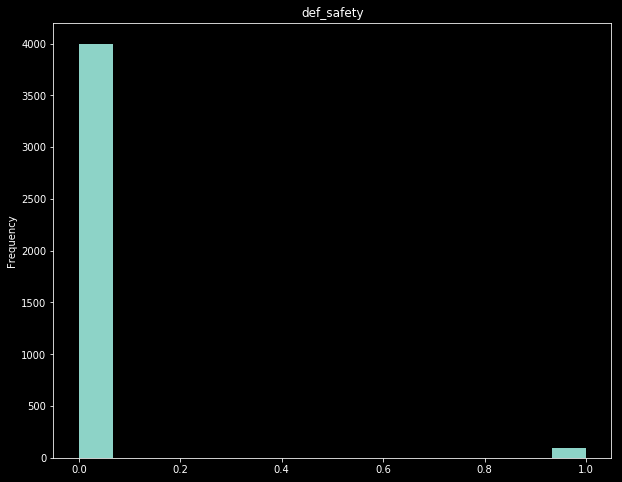

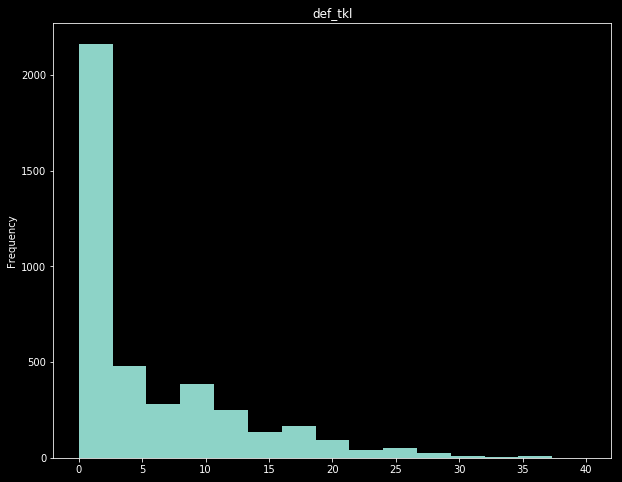

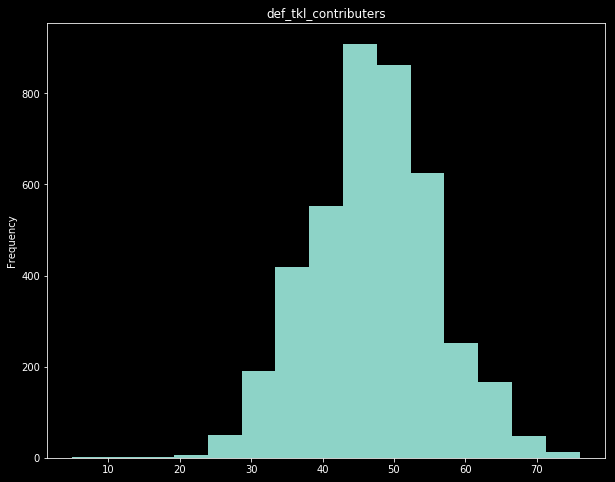

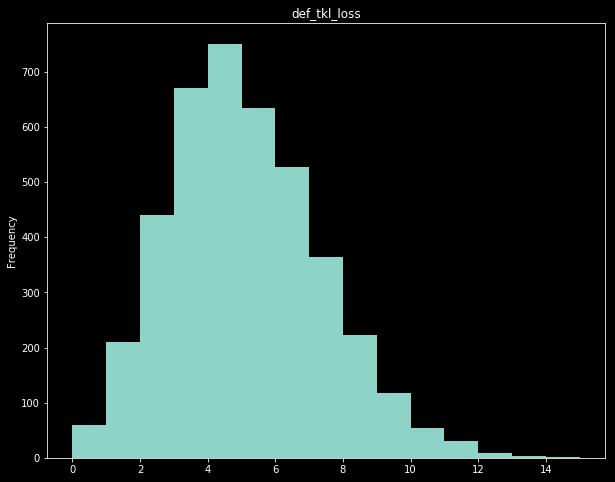

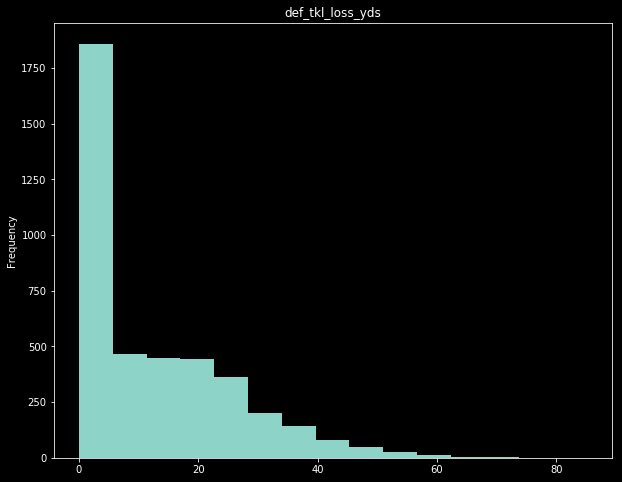

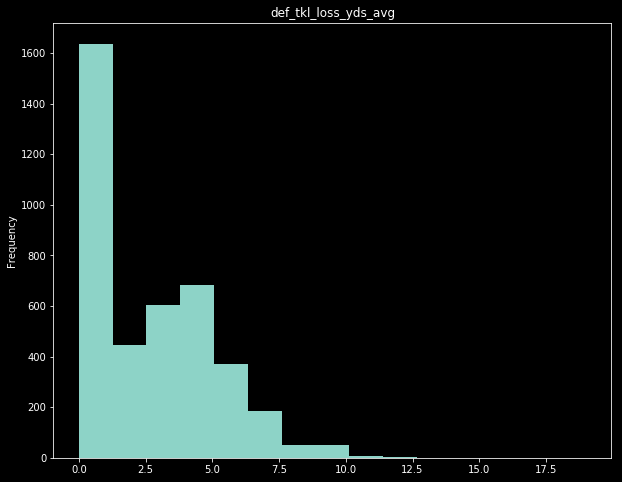

In [85]:
rcParams['figure.figsize'] = 10, 8
for col in def_cols:
    all_team_data[col].plot.hist( bins=15, title=col )
    plt.show()

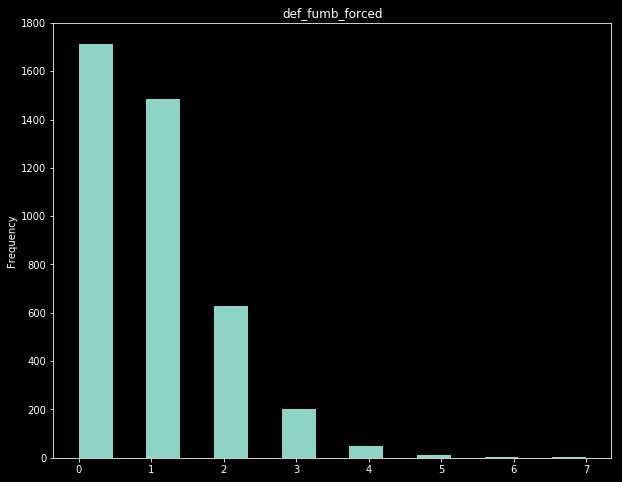

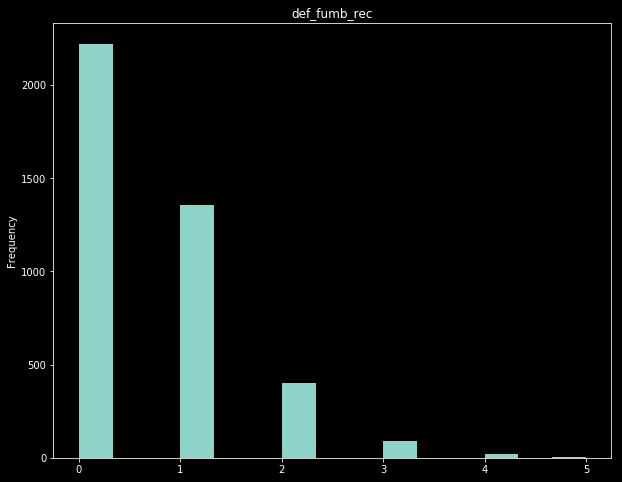

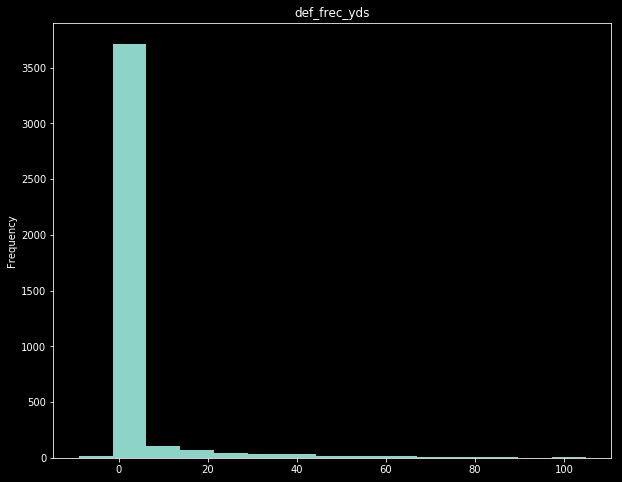

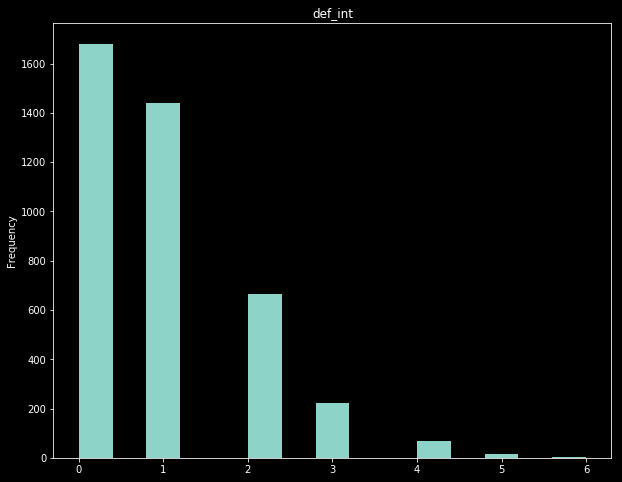

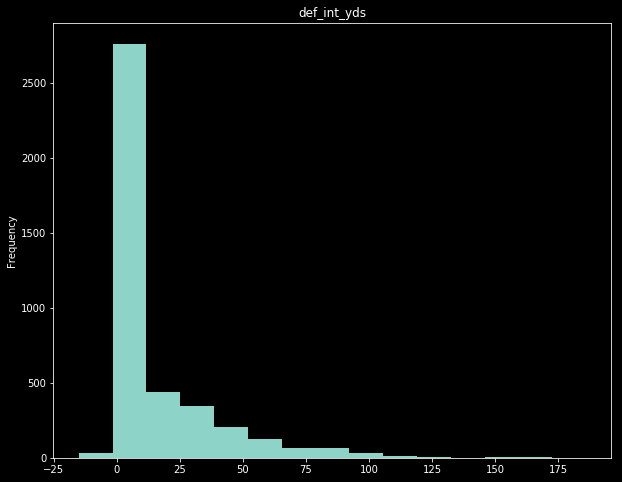

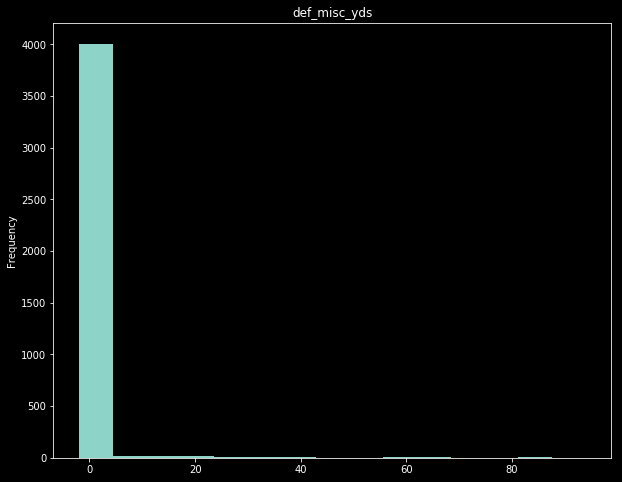

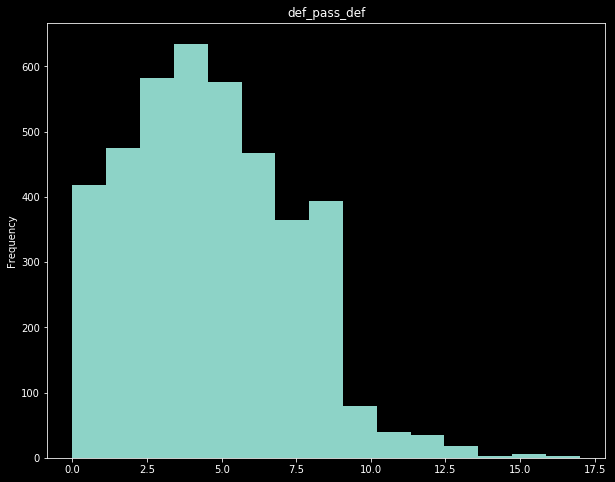

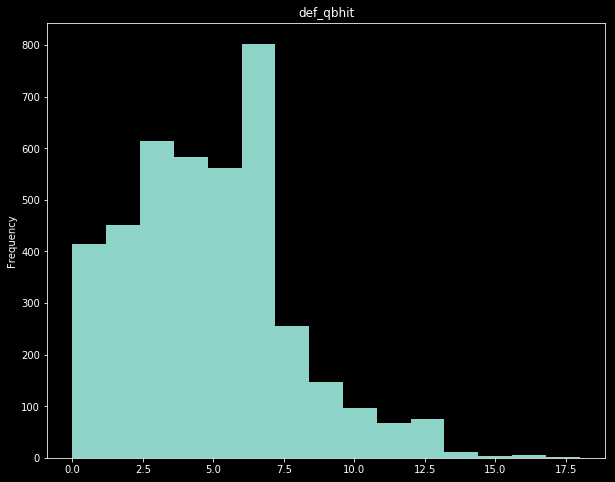

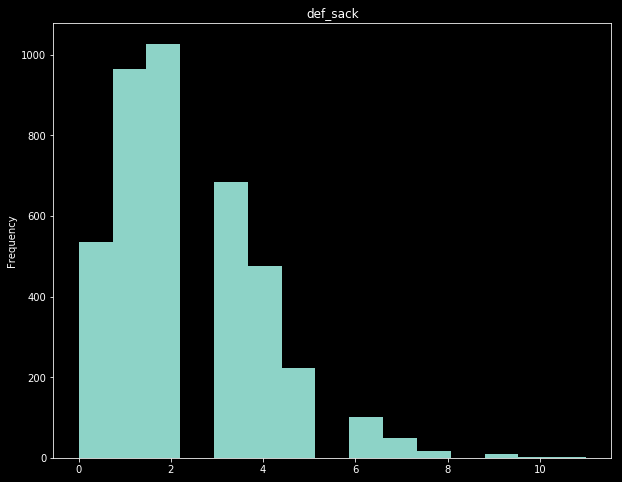

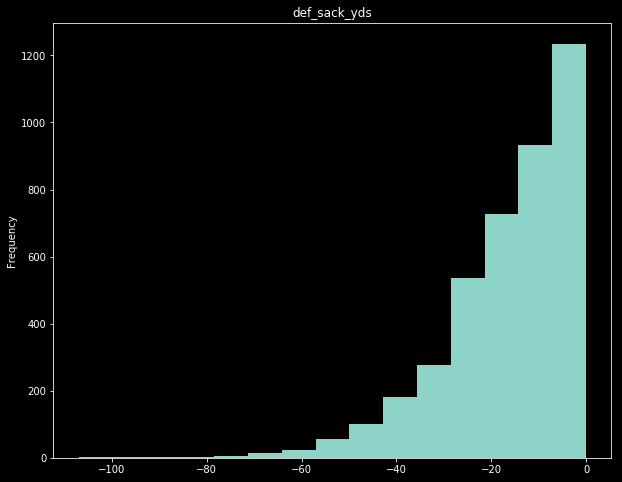

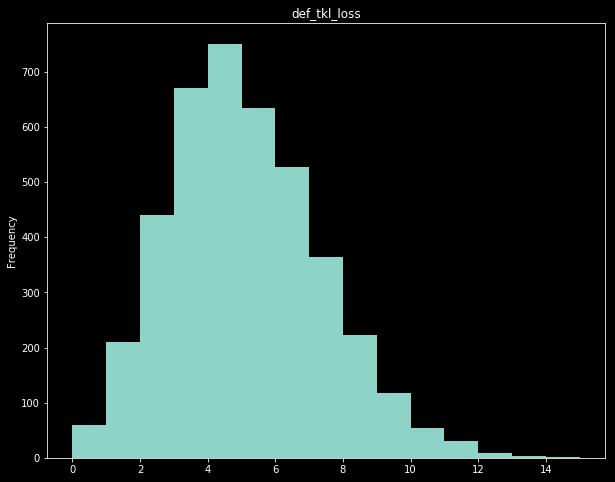

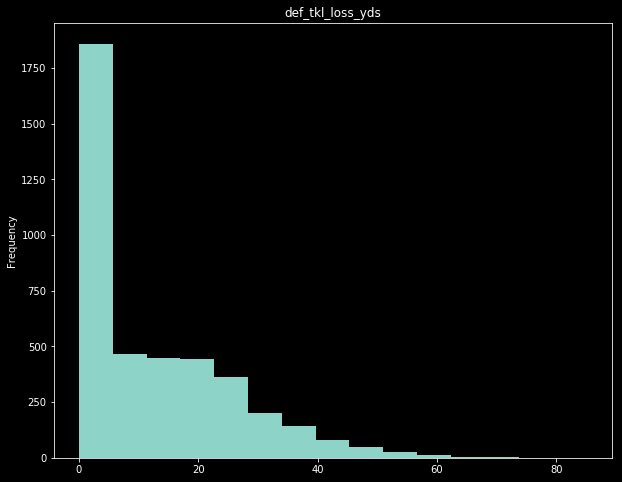

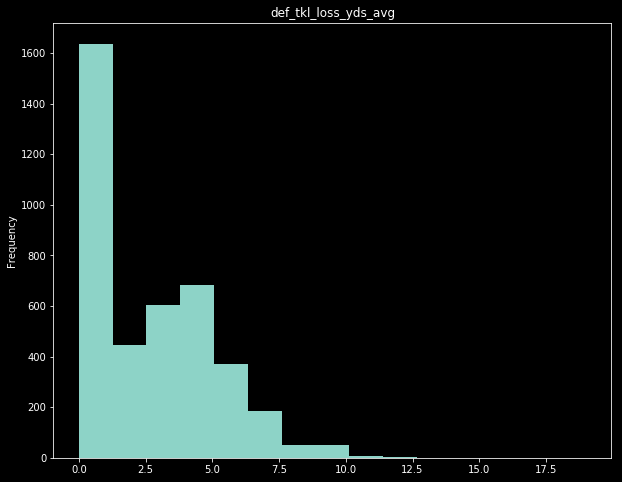

In [96]:
def_cols2 = [u'def_fumb_forced', u'def_fumb_rec', u'def_frec_yds', 
            u'def_int', u'def_int_yds', 
            u'def_misc_yds',
            u'def_pass_def', 
            u'def_qbhit', u'def_sack', u'def_sack_yds', 
            u'def_tkl_loss', u'def_tkl_loss_yds','def_tkl_loss_yds_avg'] 
for col in def_cols2:
    all_team_data[col].plot.hist( bins=15, title=col )
    plt.show()

In [114]:
def_turn = [u'def_fumb_forced', u'def_fumb_rec', u'def_int', 'def_pass_def']

print all_team_data[def_turn].corr()

print lumped_year_team_data[def_turn].sum()
print lumped_year_team_data[def_turn].corr( method='spearman' )

                 def_fumb_forced  def_fumb_rec   def_int  def_pass_def
def_fumb_forced         1.000000      0.672036  0.053738      0.066781
def_fumb_rec            0.672036      1.000000  0.051600      0.067076
def_int                 0.053738      0.051600  1.000000      0.517394
def_pass_def            0.066781      0.067076  0.517394      1.000000
def_fumb_forced     3633
def_fumb_rec        2527
def_int             3812
def_pass_def       19166
dtype: int64
                 def_fumb_forced  def_fumb_rec   def_int  def_pass_def
def_fumb_forced         1.000000      0.647637  0.022535      0.099215
def_fumb_rec            0.647637      1.000000  0.132989      0.123816
def_int                 0.022535      0.132989  1.000000      0.518457
def_pass_def            0.099215      0.123816  0.518457      1.000000


In [121]:
def_yds = [u'def_frec_yds', u'def_int_yds', u'def_misc_yds', u'def_sack_yds', u'def_tkl_loss_yds'] 

print all_team_data[def_yds].corr()

print lumped_year_team_data[def_yds].sum()
print lumped_year_team_data[def_yds].corr( method='spearman' )

                  def_frec_yds  def_int_yds  def_misc_yds  def_sack_yds  \
def_frec_yds          1.000000     0.042049     -0.015129     -0.042833   
def_int_yds           0.042049     1.000000      0.007639     -0.067463   
def_misc_yds         -0.015129     0.007639      1.000000     -0.006151   
def_sack_yds         -0.042833    -0.067463     -0.006151      1.000000   
def_tkl_loss_yds      0.012824     0.014262      0.021177     -0.457026   

                  def_tkl_loss_yds  
def_frec_yds              0.012824  
def_int_yds               0.014262  
def_misc_yds              0.021177  
def_sack_yds             -0.457026  
def_tkl_loss_yds          1.000000  
def_frec_yds        10890
def_int_yds         54724
def_misc_yds         2719
def_sack_yds       -65843
def_tkl_loss_yds    48508
dtype: int64
                  def_frec_yds  def_int_yds  def_misc_yds  def_sack_yds  \
def_frec_yds          1.000000     0.074410      0.107364     -0.144463   
def_int_yds           0.074410    

Here let's create some defense features. Unless otherwise stated, drop the columns used to make things

In [88]:
blk_stuff = ['def_xp_blk','def_punt_blk','def_fg_blk']
all_team_data['all_blk_kicks'] = all_team_data[blk_stuff].sum(axis=1)

In [90]:
scored_stuff = ['def_int_tds','def_frec_tds','def_misc_tds','def_safety']
all_team_data['all_def_scores'] = all_team_data[scored_stuff].sum(axis=1)

In [94]:
all_team_data['solo_tkl_frac'] = all_team_data['def_tkl']/all_team_data['def_tkl_contributers']

In [115]:
def_turn = [u'def_fumb_forced', u'def_fumb_rec', u'def_int', 'def_pass_def']
# Do a PCA, but keep pass def

In [99]:
# Just drop misc yds,too uncommon

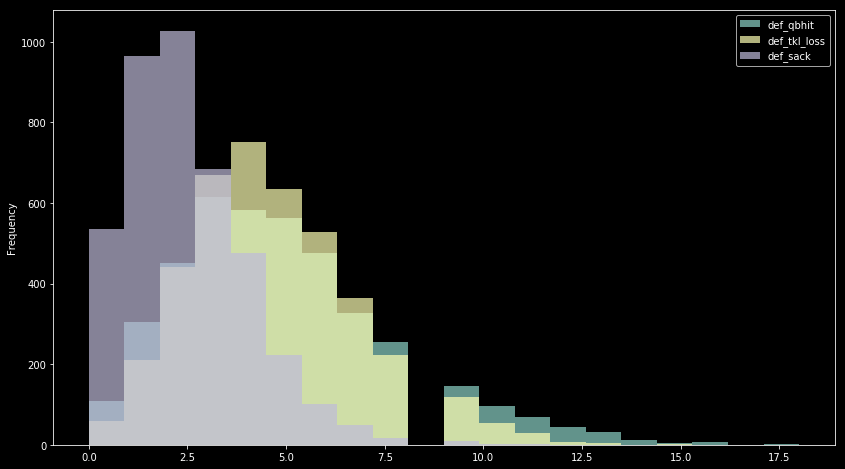

In [120]:
# Might be able to pca
all_team_data[['def_qbhit', u'def_tkl_loss','def_sack']].plot.hist(bins=20,alpha=0.7)

In [122]:
# Possibly can PCA, at least for the full year performance
def_yds = [u'def_frec_yds', u'def_int_yds', u'def_misc_yds', u'def_sack_yds', u'def_tkl_loss_yds'] 

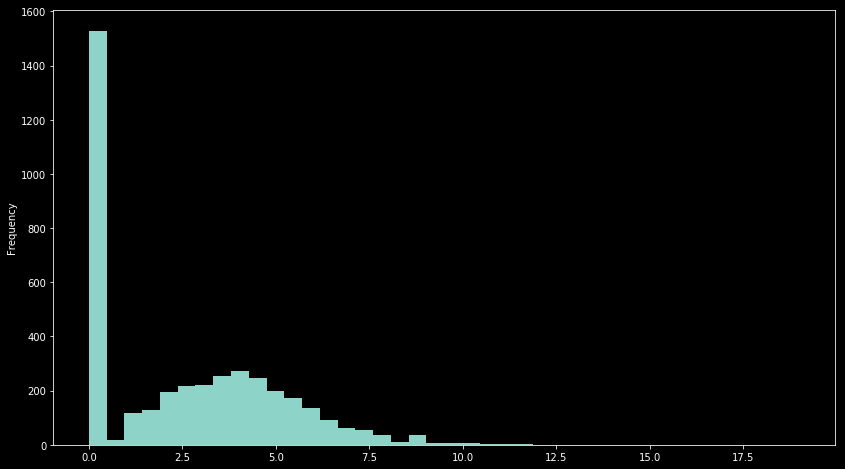

In [131]:
#  def_tkl_loss_yds_avg,      60 null values,     change to 0
all_team_data['def_tkl_loss_yds_avg'].plot.hist( bins=40 )

Let's move to kicking and returns

In [128]:
kick_att = [ u'punts', u'punt_yds',
       u'punt_blk', u'punt_rets', u'punt_ret_yds', u'punt_ret_tds',
            
            
       u'kickoffs', u'kickoff_all_yds', u'kickoff_in_20',
       u'kickoff_own_recovery', u'kickoff_own_recovery_tds',
       u'kickoff_touchback', 
            
            u'kickrets',
       u'kickret_yds', u'kickret_tds', u'kickret_touchback',
            
            u'fg_att', u'fg_blk', u'fg_made', u'fg_miss',
       u'fg_yds', u'fg_yds_max', u'fg_miss_yds', u'fg_miss_yds_min',
            
       u'xp_att', u'xp_blk', u'xp_made'] #+ avg stuff

In [127]:
# Null values present in: 
#  fg_miss_yds_min         2994
#  kickret_yds_avg          374
#  puntret_yds_avg            7

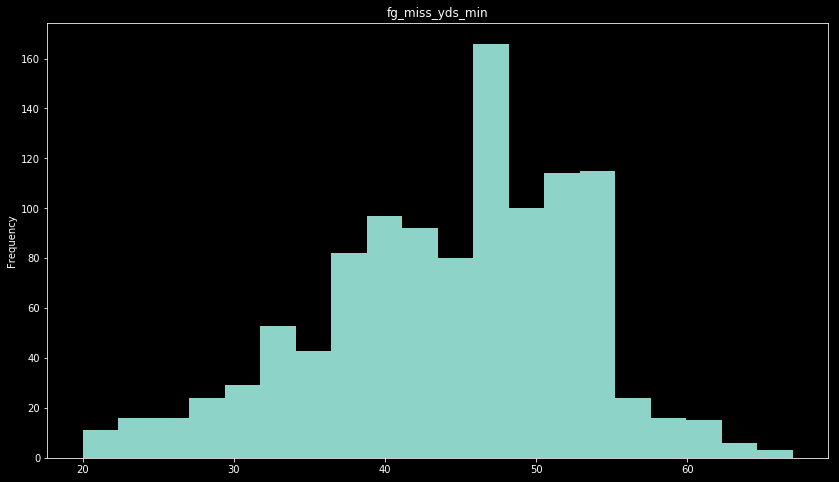

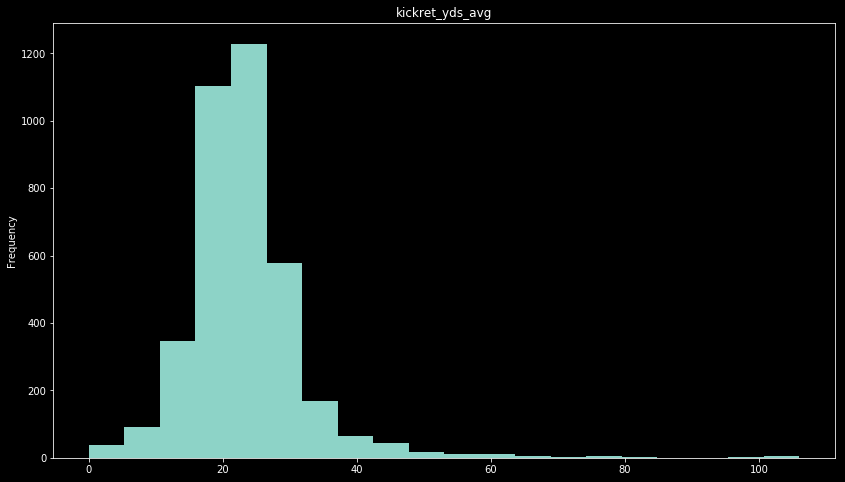

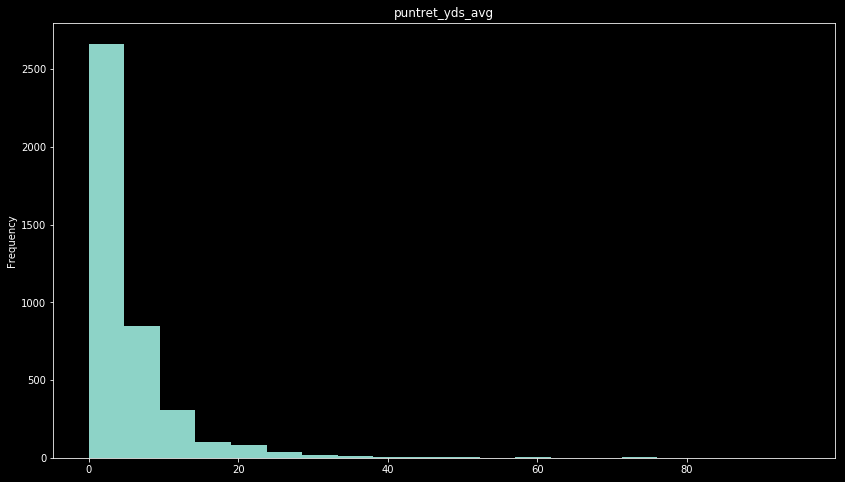

In [139]:
# fg miss yds min, may want to drop
# kickret_yds_avg, fill with median, will generally fall in that range
# puntret_yds_avg, fill with median
for col in ['fg_miss_yds_min','kickret_yds_avg','puntret_yds_avg']:
    abs(all_team_data[col]).plot.hist( bins=20, title=col )
    plt.show()

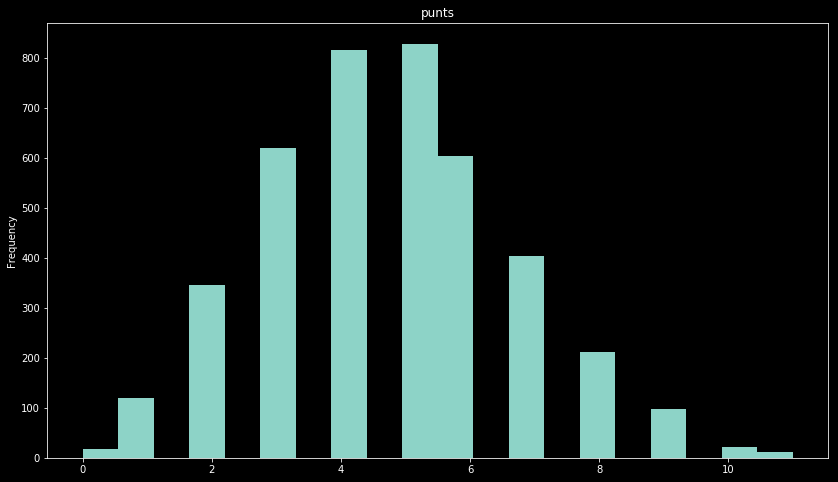

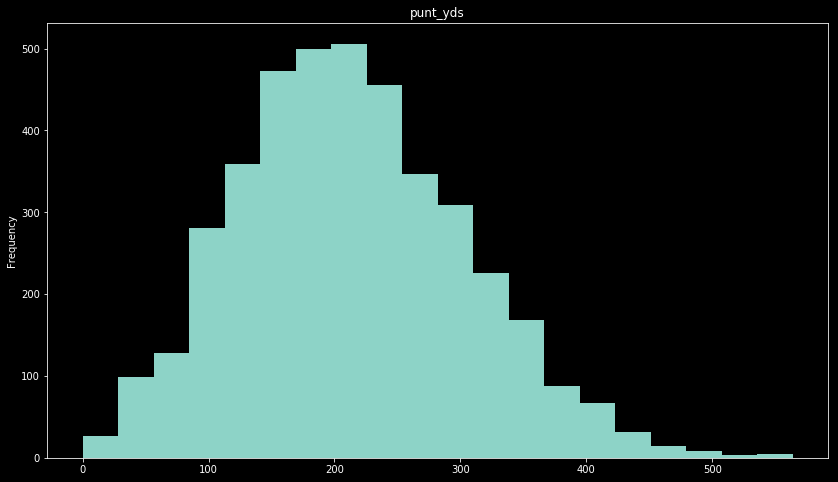

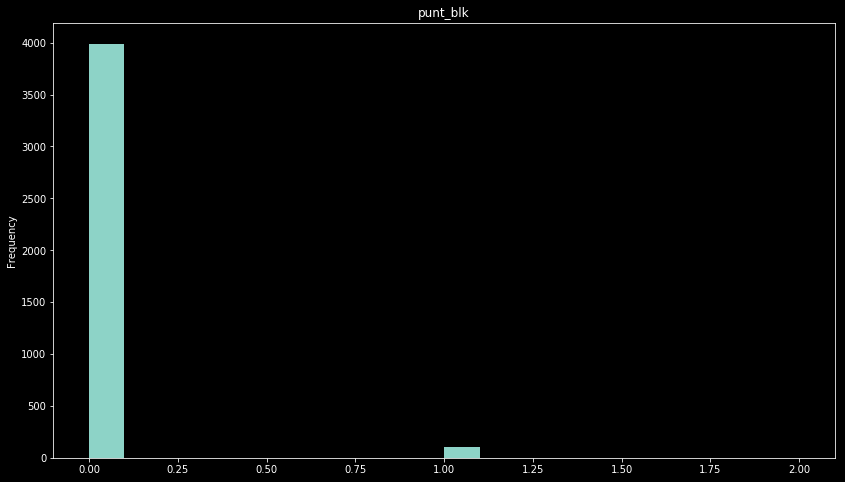

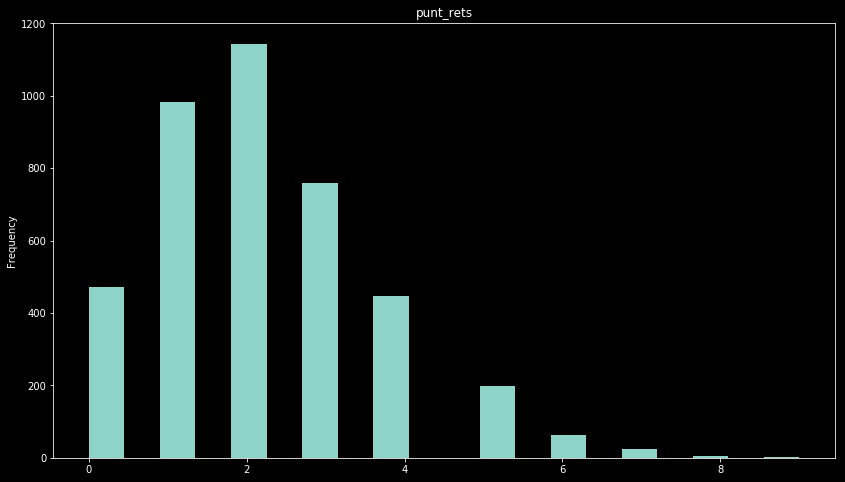

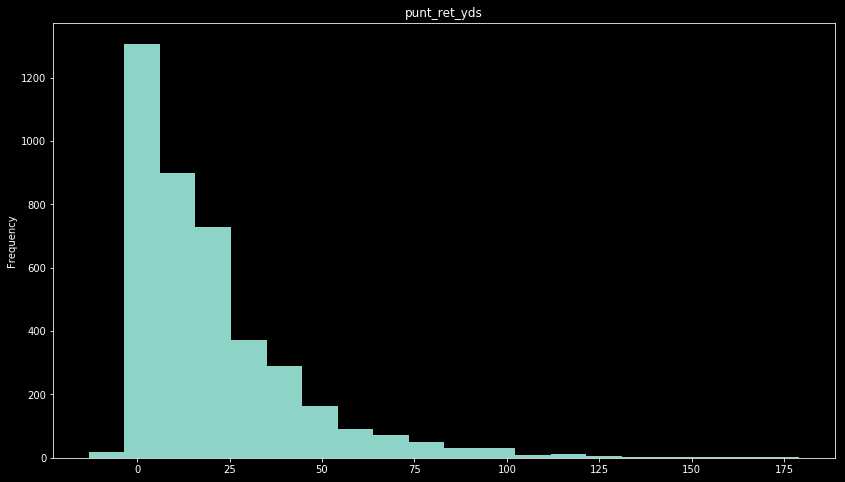

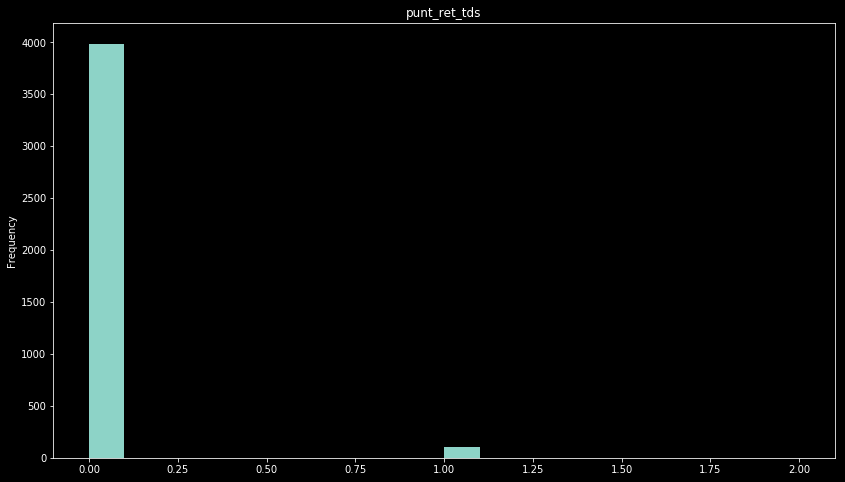

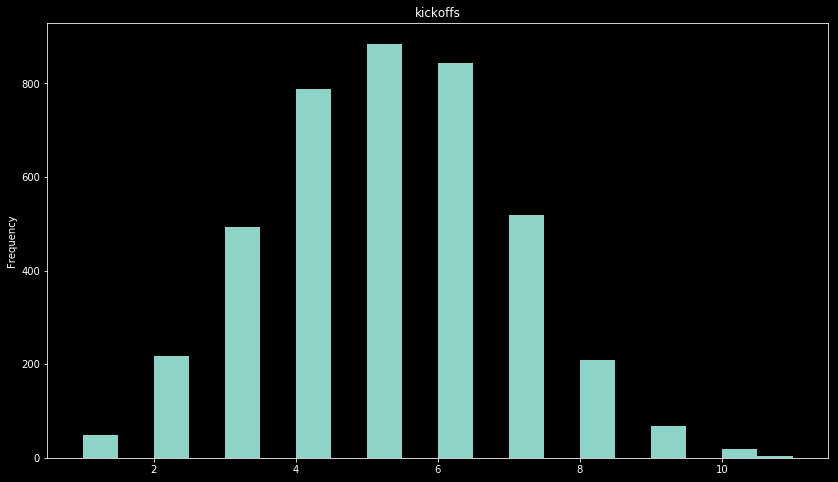

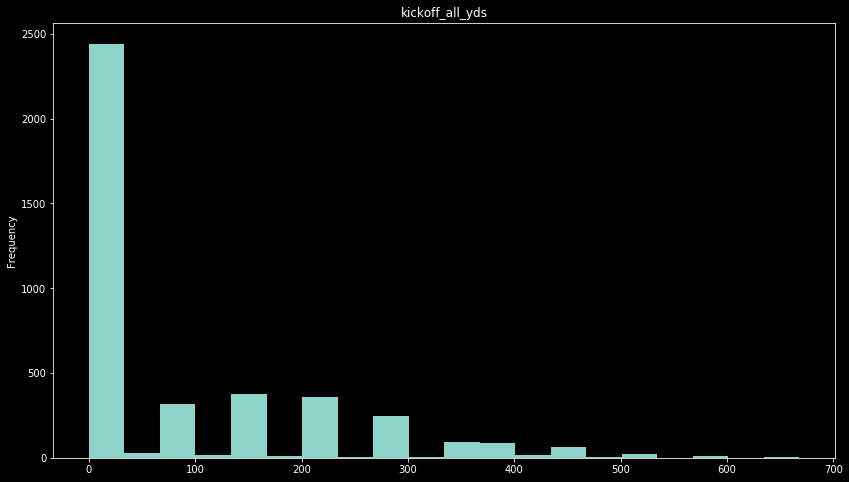

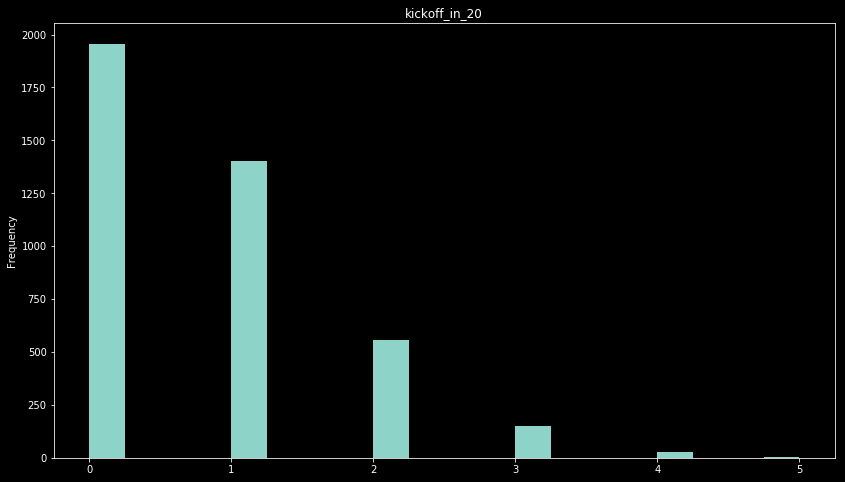

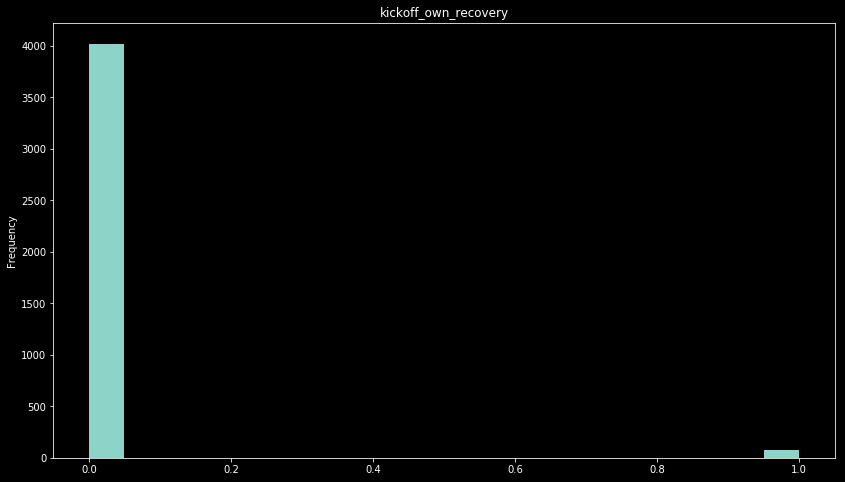

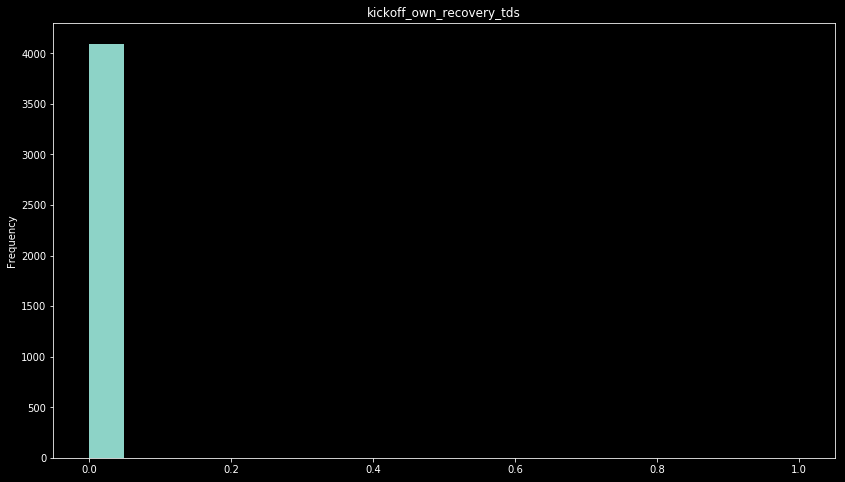

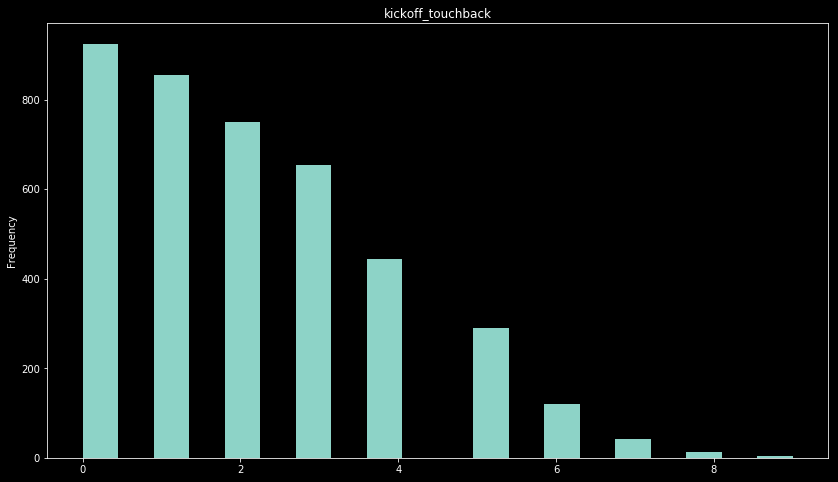

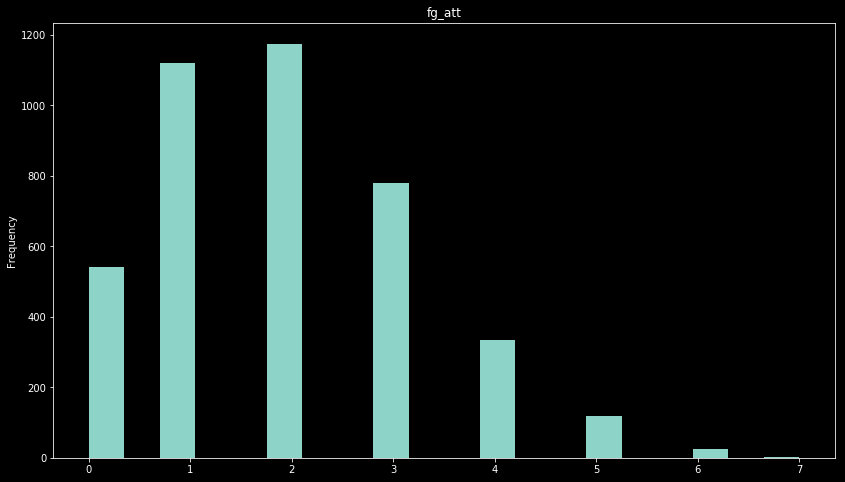

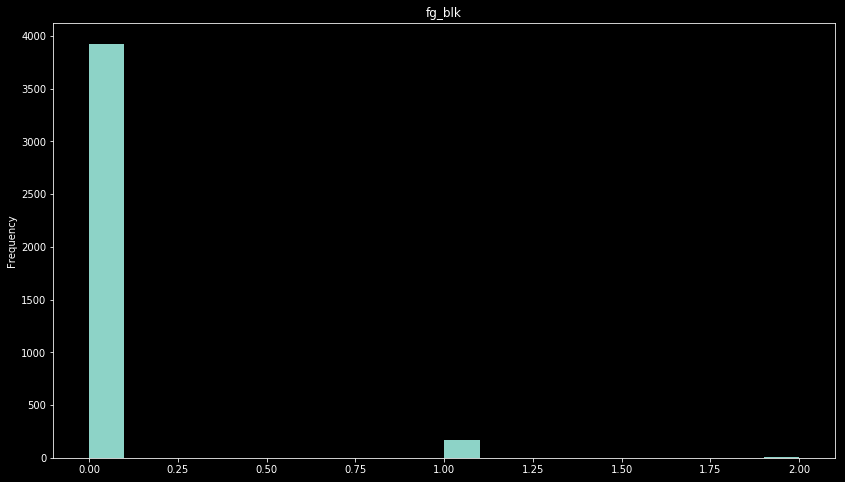

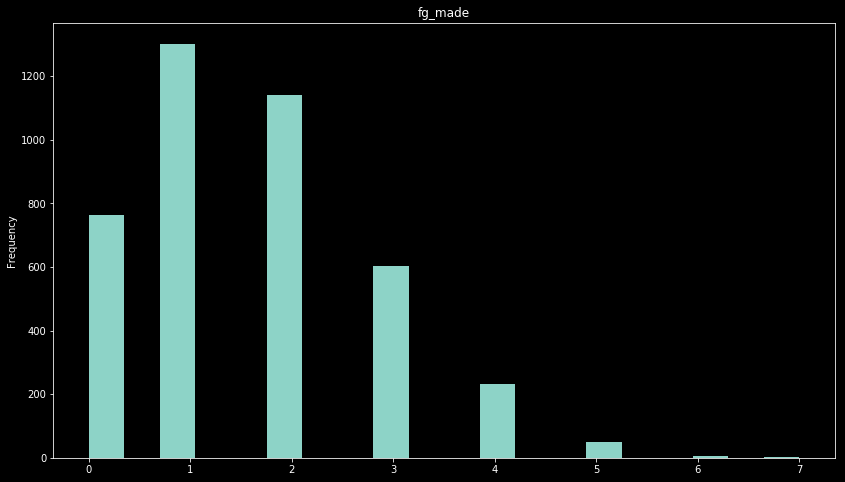

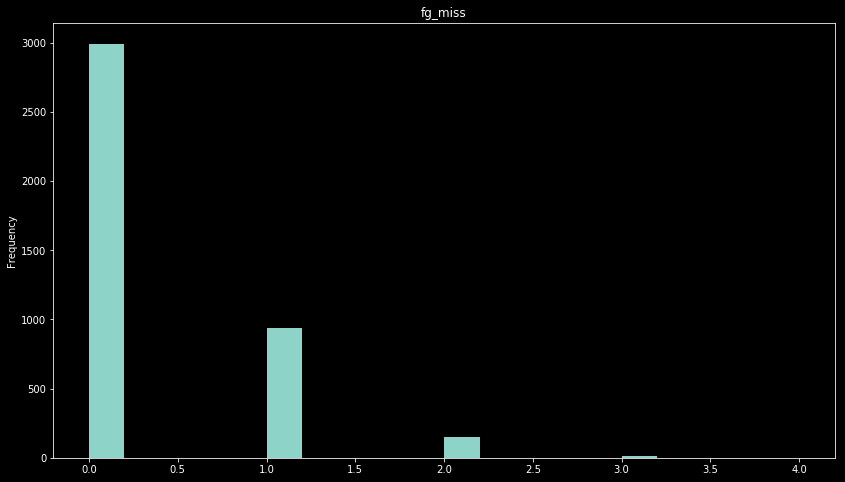

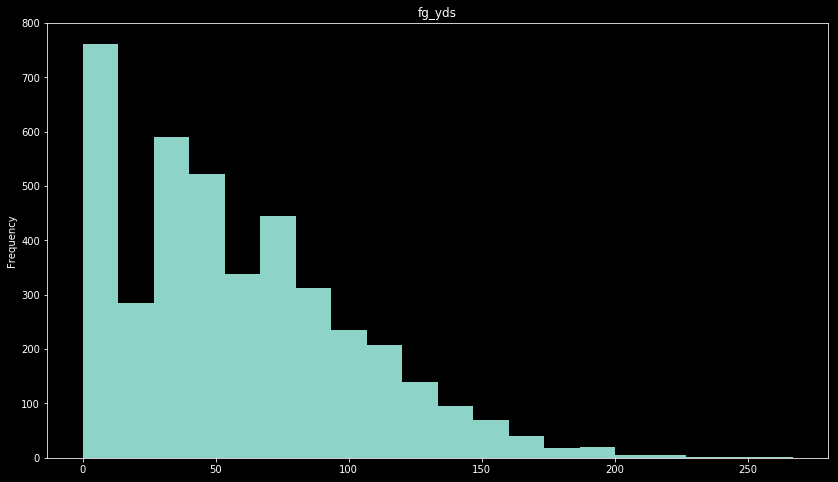

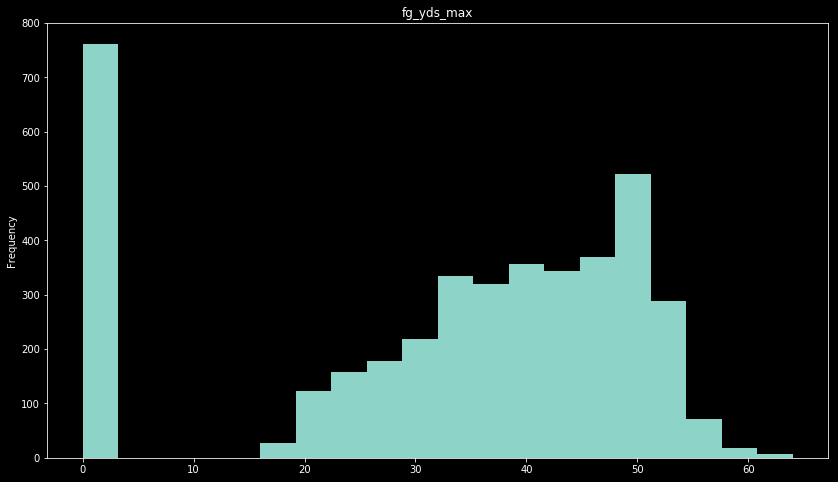

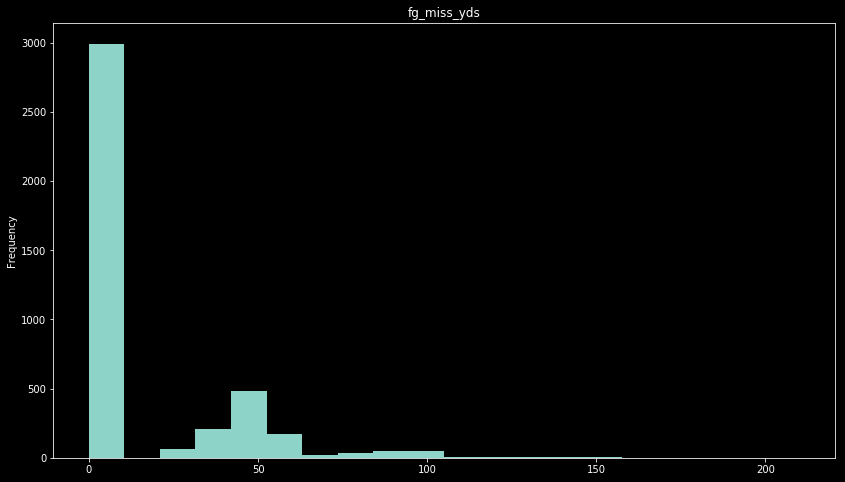

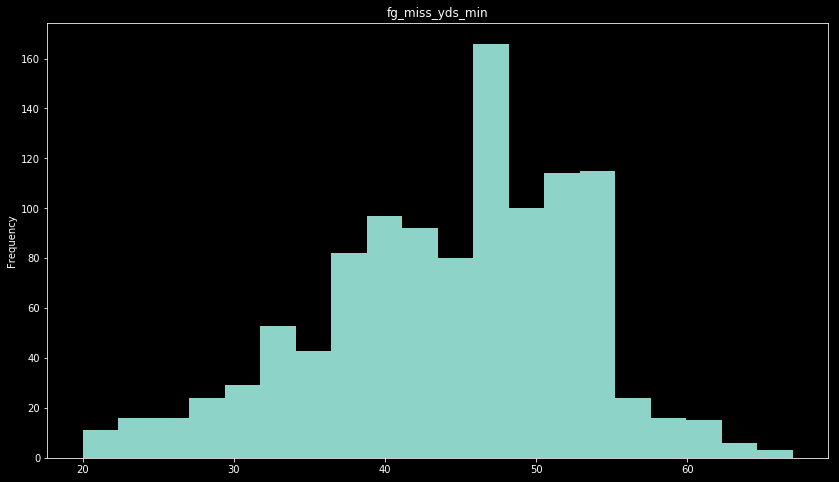

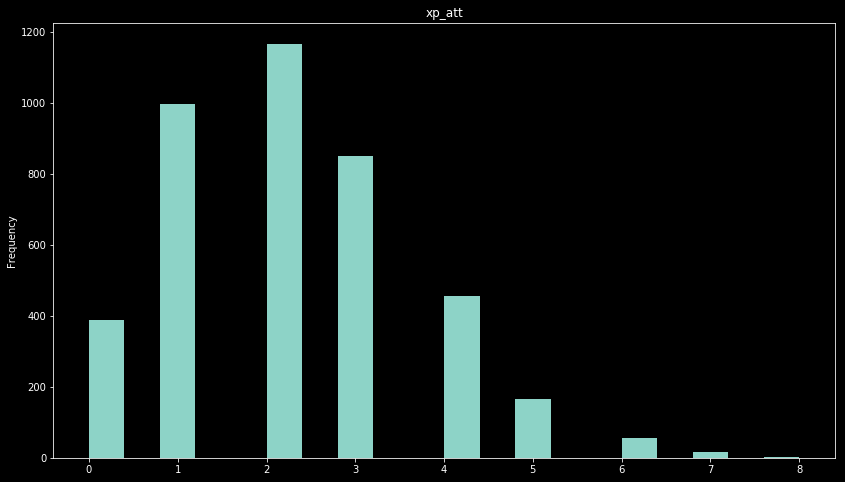

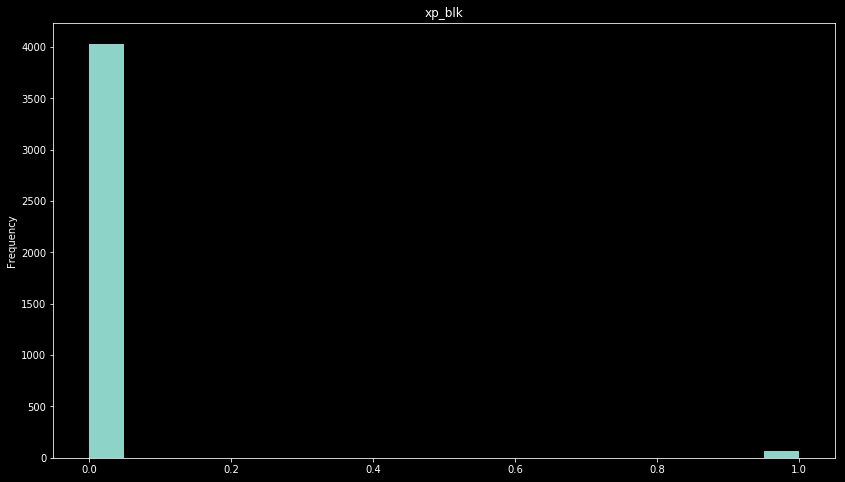

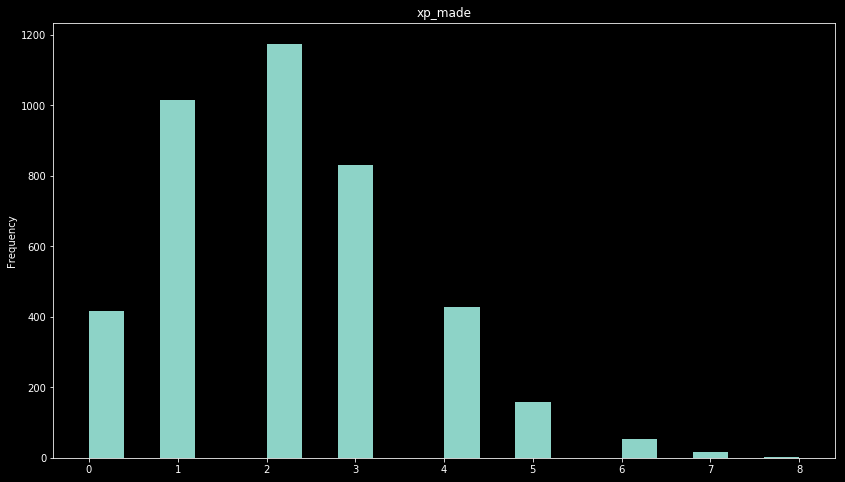

In [126]:
for col in kick_att:
    all_team_data[col].plot.hist( bins=20, title=col )
    plt.show()

Combine kicks into features, drop everything not used, and used if not specified

Will drop all xp stuff, just not significant

In [142]:
# Kickoff vs punting 
all_team_data['frac_score_drives'] = all_team_data['kickoffs'] / ( all_team_data['kickoffs'] + all_team_data['punts'] + all_team_data['fg_miss'] )

In [143]:
# Get the fraction of kickoffs that are ideal, either touchback or past the opposing 20 yd line
all_team_data['far_kickoffs'] = ( all_team_data['kickoff_in_20'] + all_team_data['kickoff_touchback'] ) / all_team_data['kickoffs']

In [145]:
# Field goal stats, just need to focus on ability to make em
# keep number of kicks made, gives opportunities
# also keep range parameters
all_team_data['fg_frac_made'] = all_team_data['fg_made'] / all_team_data['fg_att' ]
all_team_data['fg_yds_avg'  ] = all_team_data['fg_yds' ] / all_team_data['fg_made']

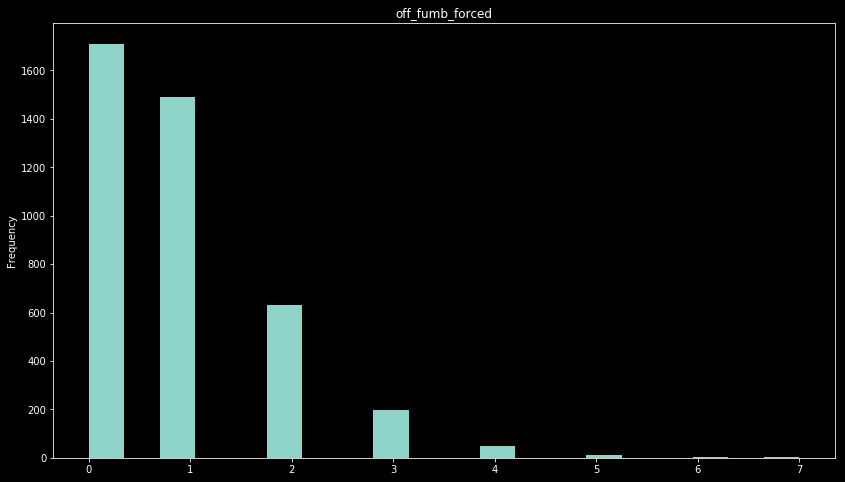

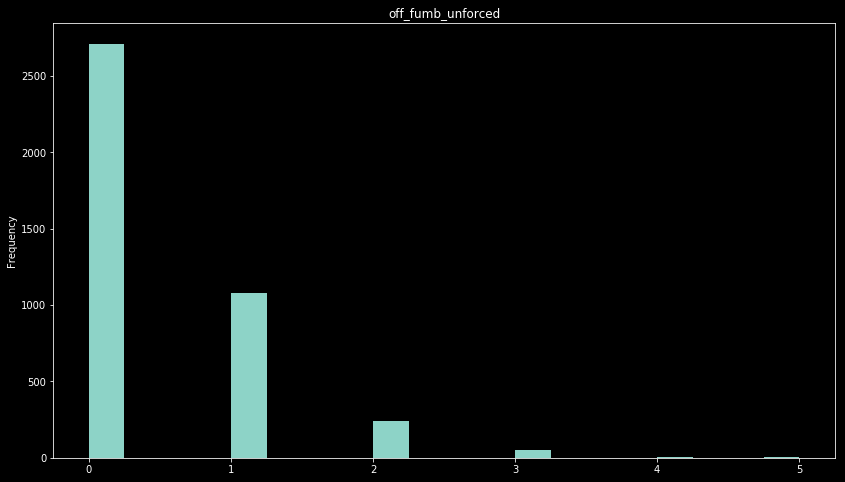

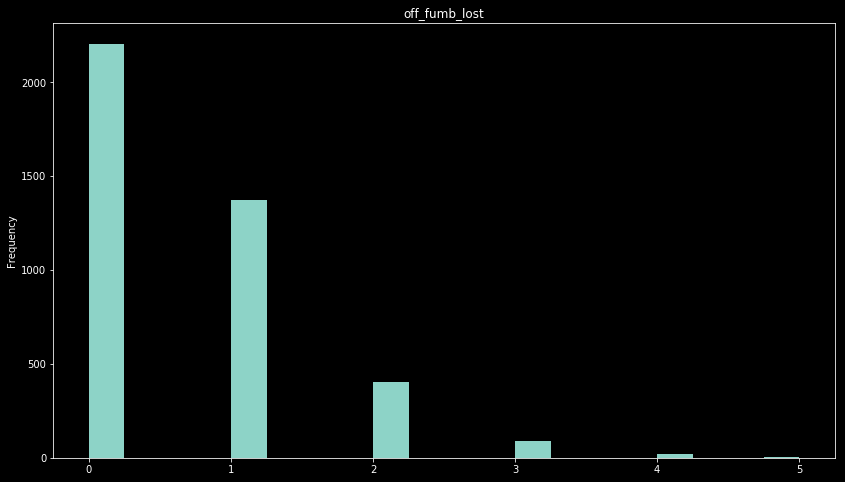

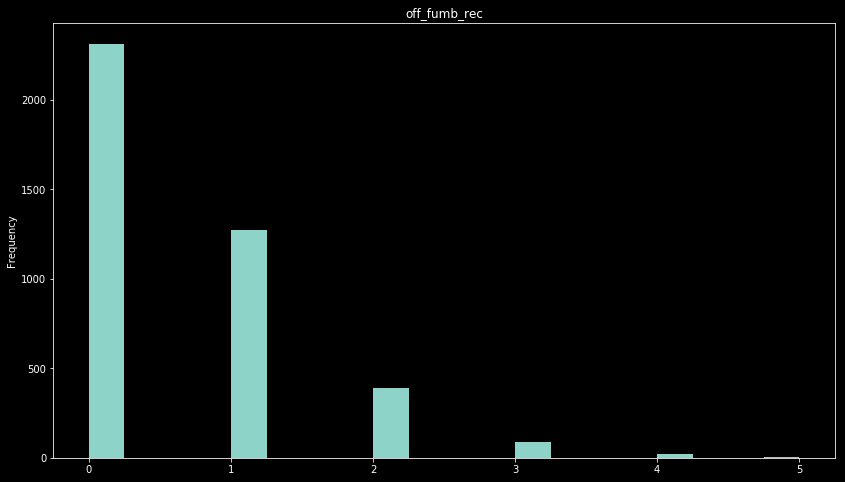

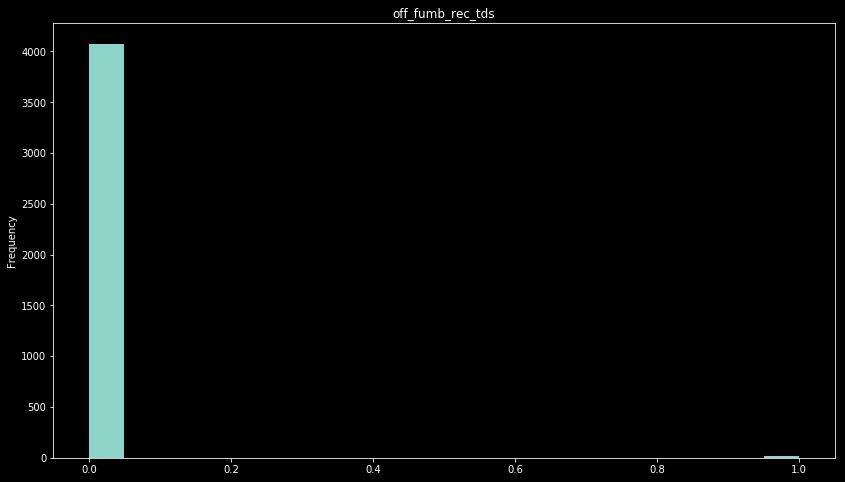

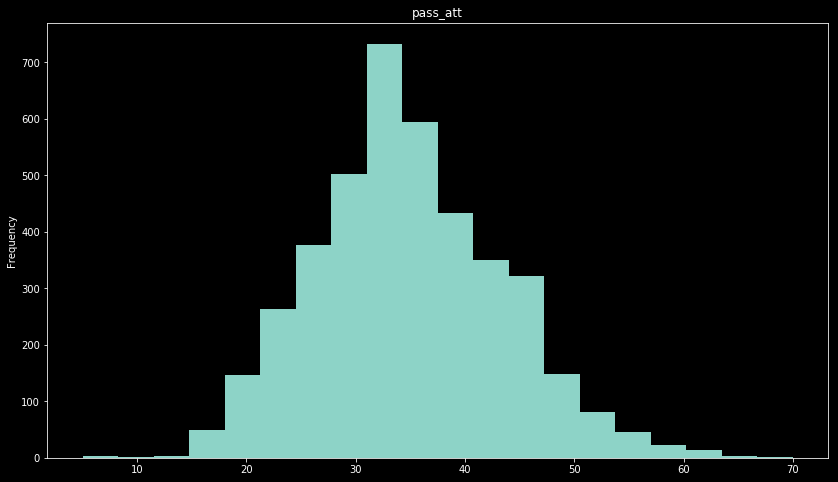

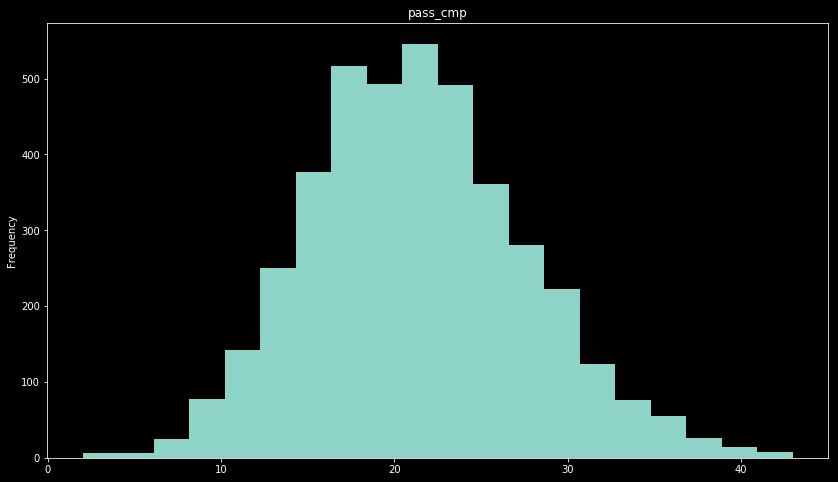

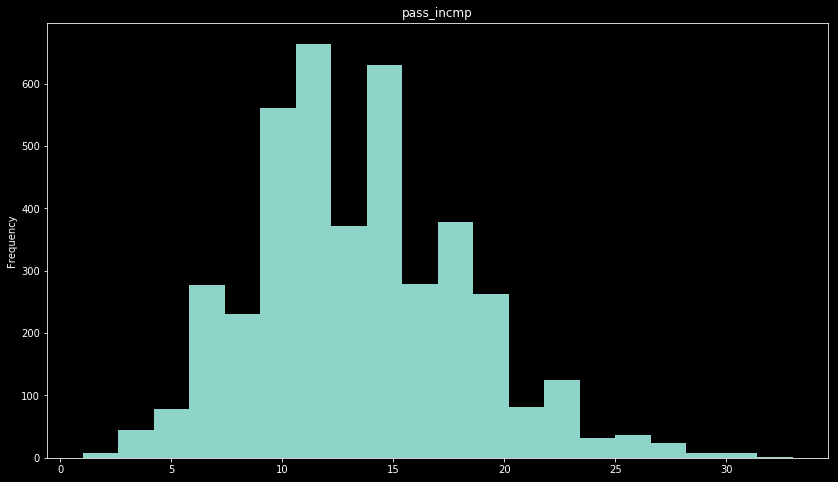

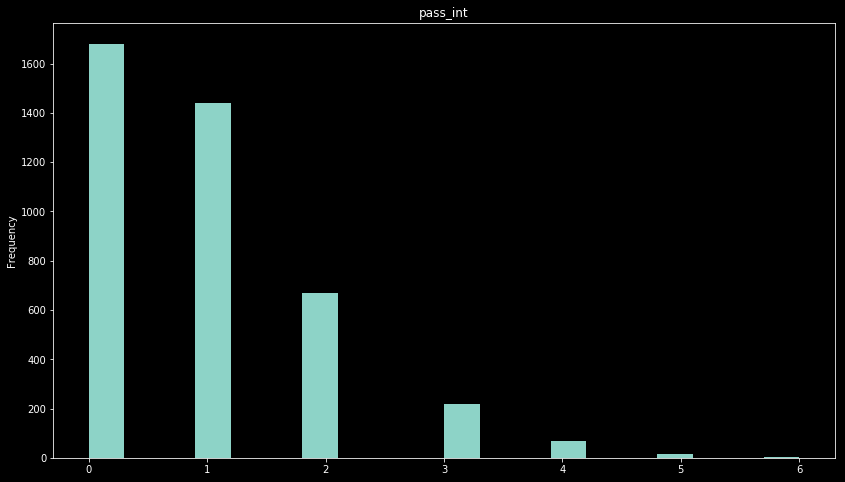

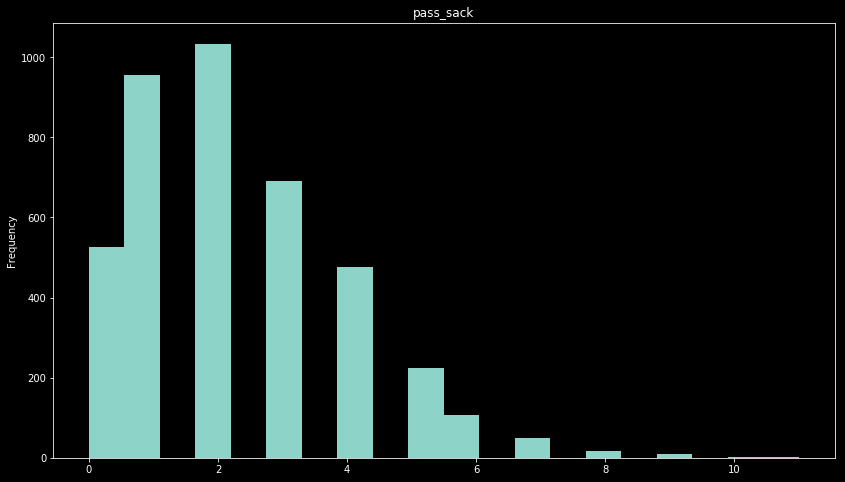

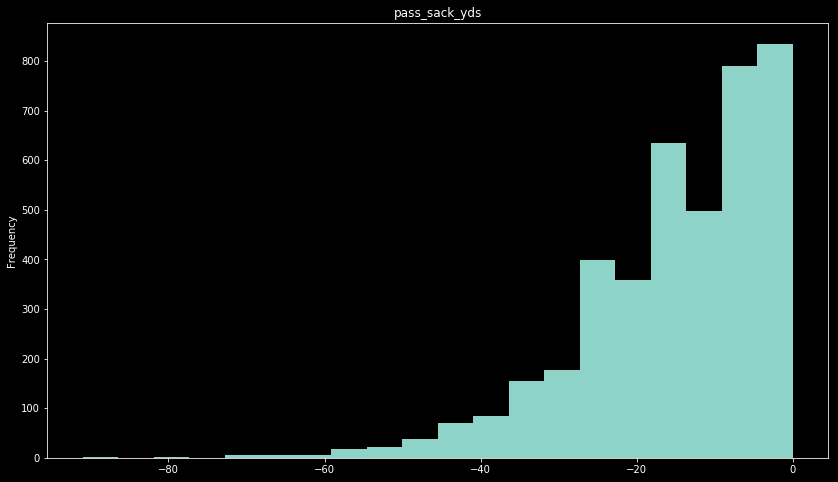

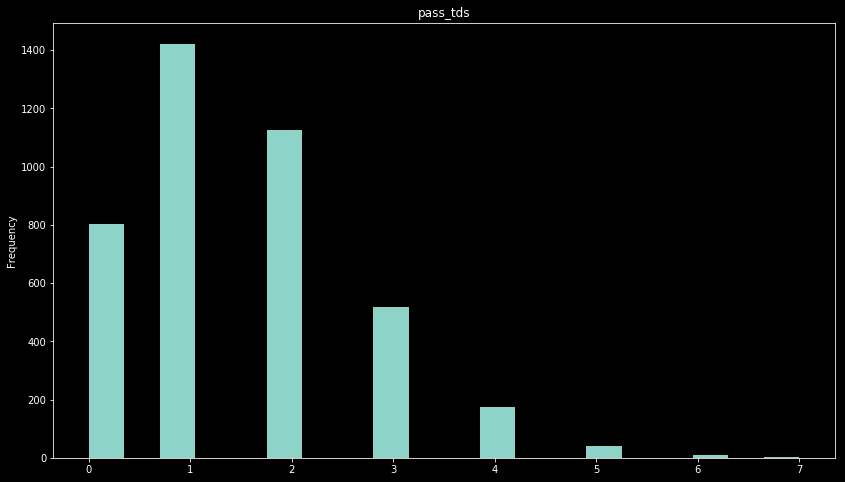

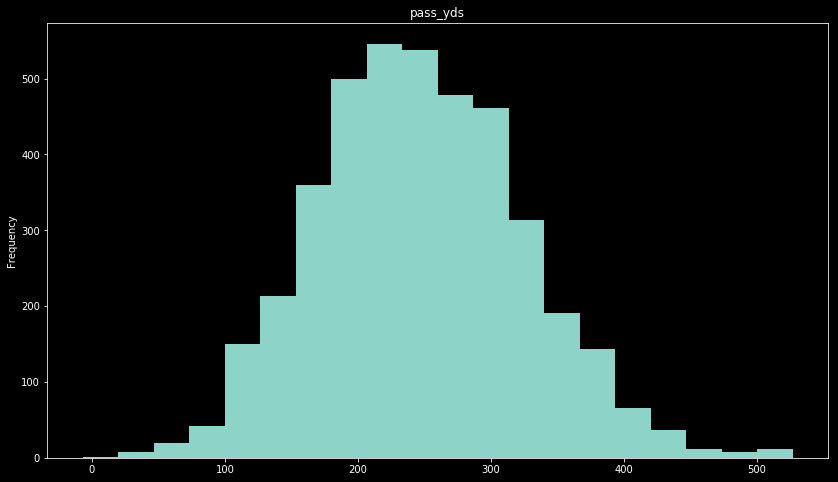

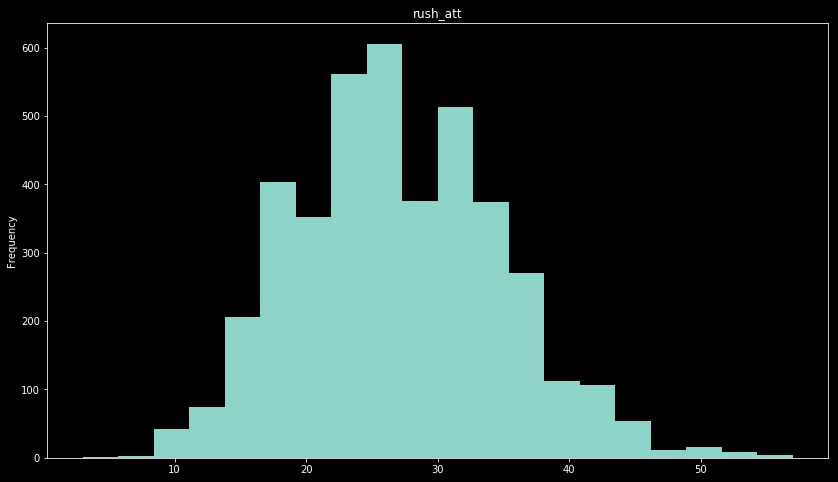

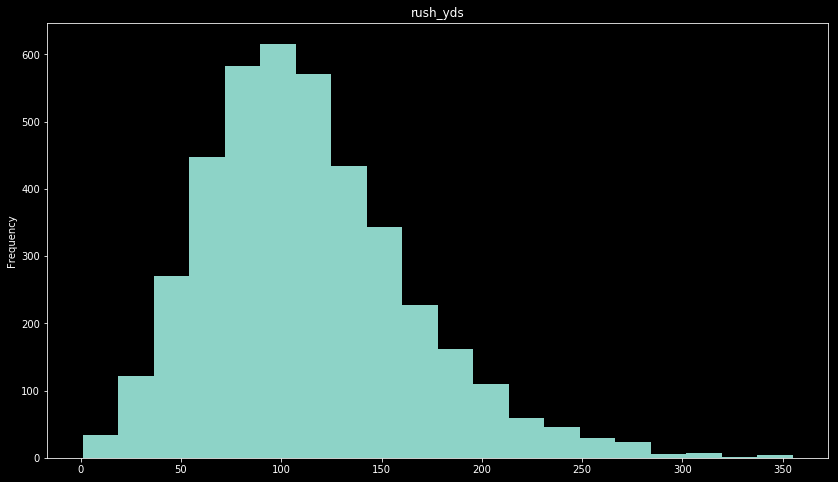

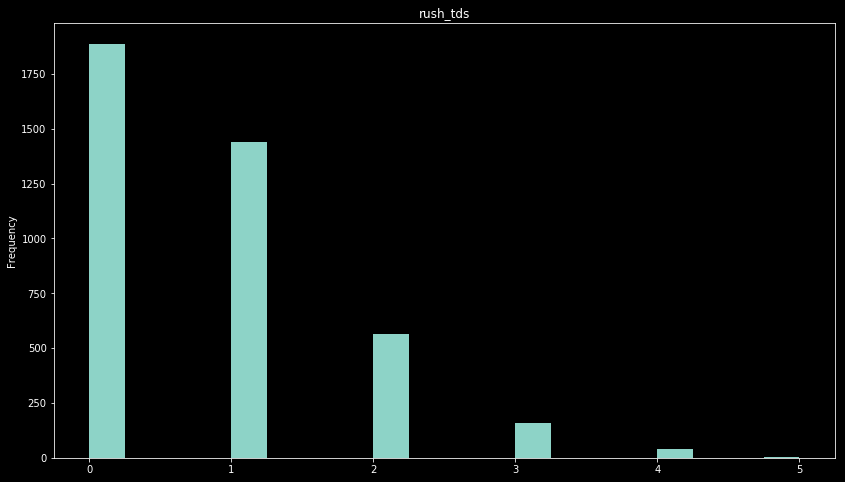

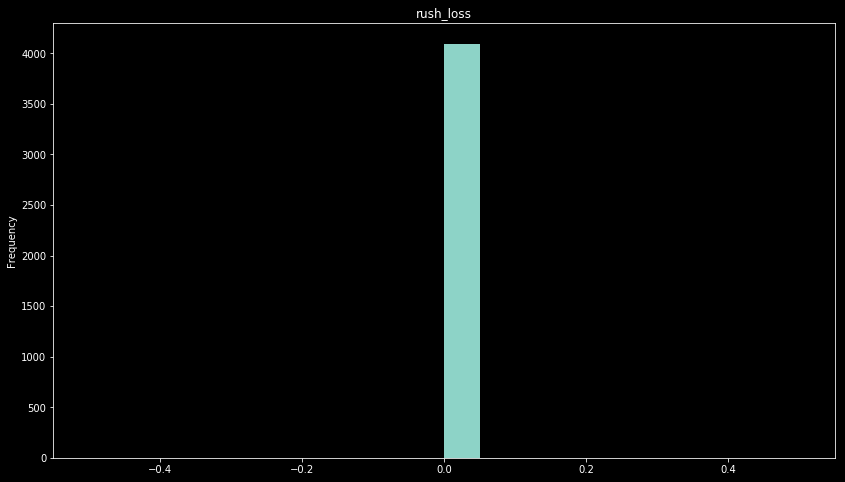

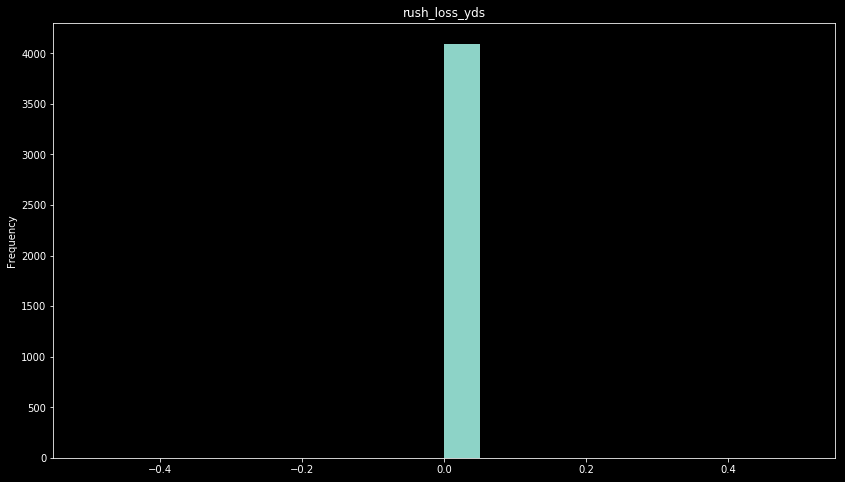

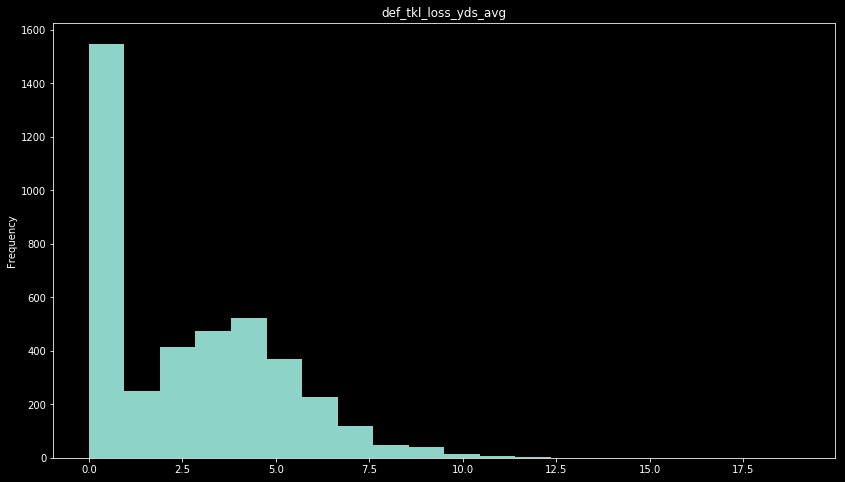

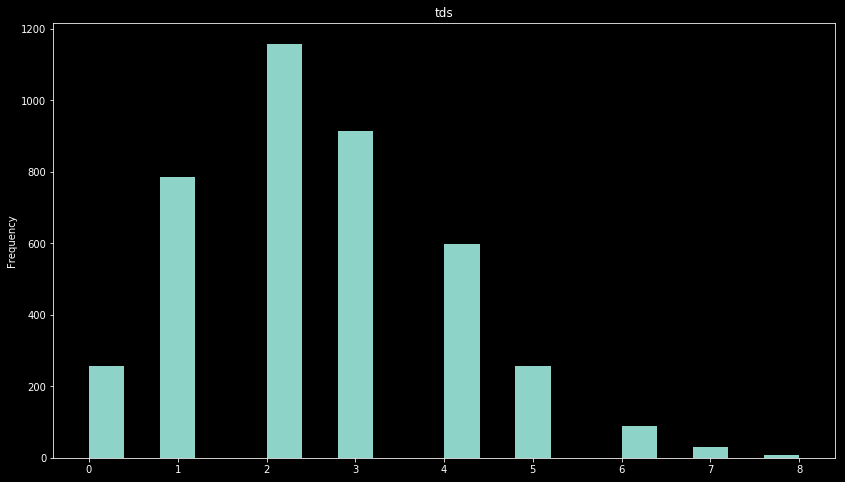

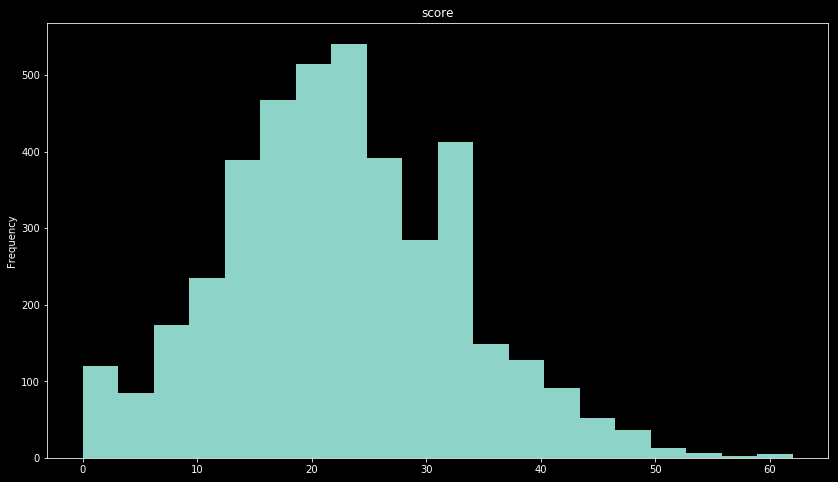

TypeError: Empty 'DataFrame': no numeric data to plot

In [148]:
for col in off_stuff:
    all_team_data[col].plot.hist( bins=20, title=col )
    plt.show()

In [147]:
off_stuff=[ 
           u'pass_att',
           u'pass_cmp', u'pass_incmp', u'pass_int', u'pass_sack',
           u'pass_sack_yds', u'pass_tds', u'pass_yds', 
           u'rush_att',
           u'rush_yds', u'rush_tds',
           'tds', 'score', 'opp_score',
           ]

Important features go:

In [149]:
# Just drop rush loss and rush loss yds

In [150]:
# Useful fumble stuffs
all_team_data['fumb_rec_frac'   ] = all_team_data['off_fumb_rec'   ] / ( all_team_data['off_fumb_rec'] + 
                                                                         all_team_data['off_fumb_lost'] )
all_team_data['fumb_furced_frac'] = all_team_data['off_fumb_forced'] / ( all_team_data['off_fumb_forced'] + 
                                                                         all_team_data['off_fumb_unforced'] )
all_team_data['fumbles'] = all_team_data['off_fumb_forced'] + all_team_data['off_fumb_unforced']

In [152]:
# Reframe pass/rush, just want general style for team
all_team_data['pass_play_frac' ] = all_team_data['pass_att'] / ( all_team_data['pass_att'] + all_team_data['rush_att'] )
all_team_data['pass_score_frac'] = all_team_data['pass_tds'] / ( all_team_data['pass_tds'] + all_team_data['rush_tds'] )
all_team_data['off_plays'      ] = all_team_data['pass_att'] +   all_team_data['rush_att']
all_team_data['pass_cmp_frac'  ] = all_team_data['pass_cmp'] /   all_team_data['pass_att']
all_team_data['pass_sack_frac' ] = all_team_data['pass_sack']/   all_team_data['pass_att']
all_team_data['rush_yds_avg'   ] = all_team_data['rush_yds'] /   all_team_data['rush_att']
all_team_data['pass_yds_avg'   ] = all_team_data['pass_yds'] /   all_team_data['pass_att']

In [6]:
# Create new df
edited_df = all_team_data[['team','opp_team','week','year', 'score', 'opp_score', 'home_flag', 'away_flag', 'tds']].copy()


# Offense


# General offensive play breakdowns
edited_df['pass_play_frac' ] = all_team_data['pass_att'] / ( all_team_data['pass_att'] + all_team_data['rush_att'] )
#edited_df['pass_score_frac'] = all_team_data['pass_tds'] / ( all_team_data['pass_tds'] + all_team_data['rush_tds'] )
edited_df['off_plays'      ] = all_team_data['pass_att'] +   all_team_data['rush_att']
edited_df['pass_cmp_frac'  ] = all_team_data['pass_cmp'] /   all_team_data['pass_att']
edited_df['pass_sack_frac' ] = all_team_data['pass_sack']/   all_team_data['pass_att']
edited_df['rush_yds_avg'   ] = all_team_data['rush_yds'] /   all_team_data['rush_att']
edited_df['pass_yds_avg'   ] = all_team_data['pass_yds'] /   all_team_data['pass_att']
edited_df['rush_yds'       ] = all_team_data['rush_yds']
edited_df['pass_yds'       ] = all_team_data['pass_yds']


# Get info onto offense effectiveness
edited_df['frac_score_drives'] = all_team_data['kickoffs'] / ( all_team_data['kickoffs'] + 
                                                               all_team_data['punts'   ] + 
                                                               all_team_data['fg_miss' ] )


# How well off keeps the ball
#edited_df['fumb_rec_frac'   ] = all_team_data['off_fumb_rec'   ] /  all_team_data['off_fumb_tot']
#edited_df['fumb_forced_frac'] = all_team_data['off_fumb_forced'] /  all_team_data['off_fumb_tot']
edited_df['fumbles'         ] = all_team_data['off_fumb_tot'   ]



# Kickoffs that land far,
#  w/in 20 yd line or touchbacks
edited_df['far_kickoffs'     ] = ( all_team_data['kickoff_in_20'] + 
                                   all_team_data['kickoff_touchback'] ) / all_team_data['kickoffs']

# How good they are at putting in the kicker
# And how far that is
#edited_df['fg_frac_made'] = all_team_data['fg_made'] / all_team_data['fg_att' ]
edited_df['fg_yds_avg'  ] = all_team_data['fg_yds' ] / all_team_data['fg_made']



# Defense

# How many scores total
scored_stuff = ['def_int_tds','def_frec_tds','def_misc_tds','def_safety']
edited_df['def_score_flag'] = 0
edited_df.loc[all_team_data[scored_stuff].sum(axis=1)>0,'def_score_flag'] = 1

# Can defense do a good job one on one, 
#  or does whole D need to tackle one guy
edited_df['solo_tkl_frac'] = all_team_data['def_tkl']/all_team_data['def_tkl_contributers']

# Defensive turnovers
def_turn = [u'def_fumb_forced', u'def_fumb_rec', u'def_int']
edited_df[def_turn] = all_team_data[def_turn].copy()

# Pressure
def_hits = ['def_qbhit', u'def_tkl_loss','def_sack', 'def_pass_def']
edited_df[def_hits] = all_team_data[def_hits].copy()

# Yards the defense makes
def_yds = [u'def_frec_yds', u'def_int_yds', u'def_misc_yds', u'def_sack_yds', u'def_tkl_loss_yds']#,'def_tkl_loss_yds_avg'] 
edited_df[def_yds] = all_team_data[def_yds].copy()

# No fg made, just go with median
edited_df['fg_yds_avg'].fillna( edited_df['fg_yds_avg'].median() , inplace=True )

In [6]:
edited_df.shape

(4096, 32)

In [7]:
edited_df.columns.values

array([u'team', 'opp_team', u'week', 'year', 'score', 'opp_score',
       'home_flag', 'away_flag', 'pass_play_frac', 'off_plays',
       'pass_cmp_frac', 'pass_sack_frac', 'rush_yds_avg', 'pass_yds_avg',
       'frac_score_drives', 'fumbles', 'far_kickoffs', 'fg_yds_avg',
       'def_score_flag', 'solo_tkl_frac', u'def_fumb_forced',
       u'def_fumb_rec', u'def_int', 'def_qbhit', u'def_tkl_loss',
       'def_sack', 'def_pass_def', u'def_frec_yds', u'def_int_yds',
       u'def_misc_yds', u'def_sack_yds', u'def_tkl_loss_yds'], dtype=object)

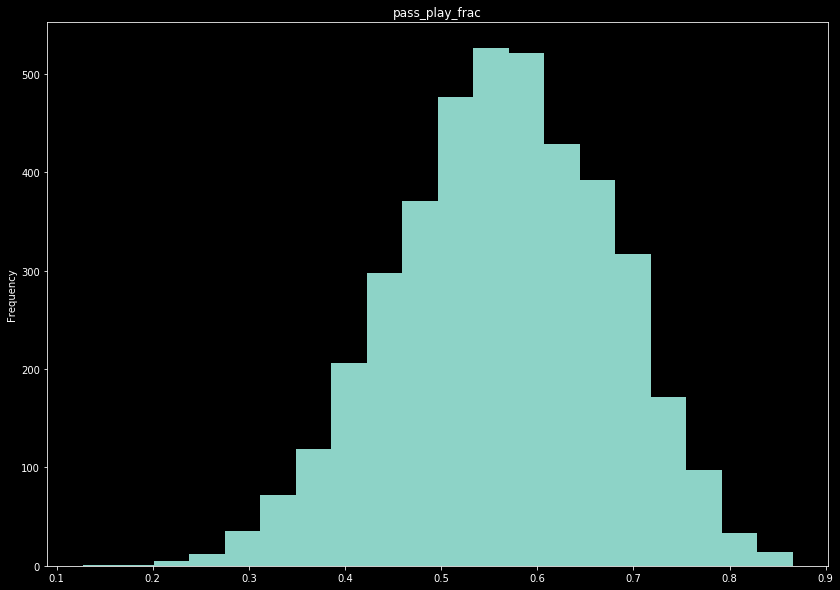

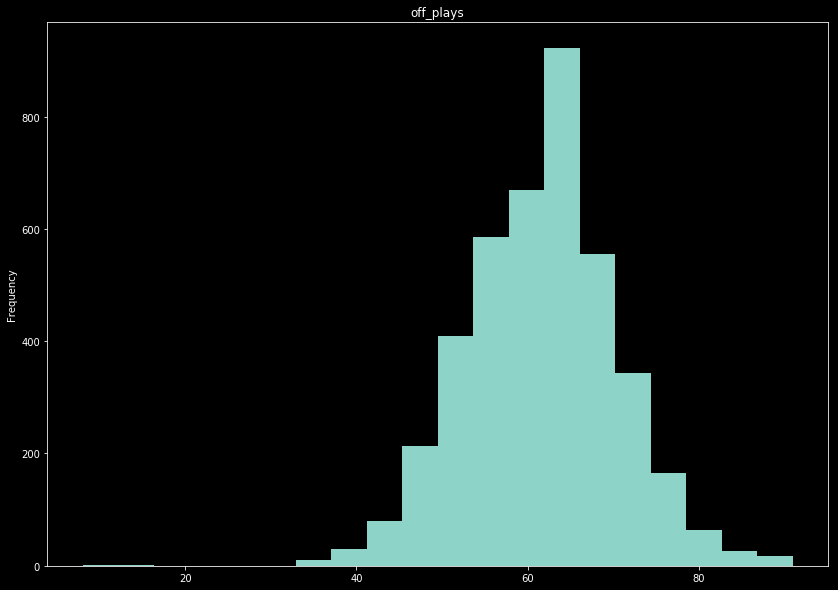

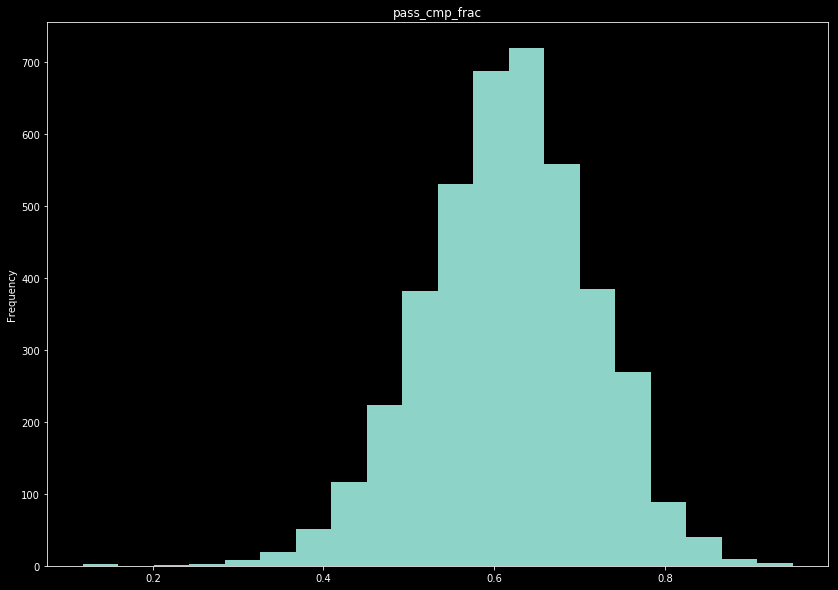

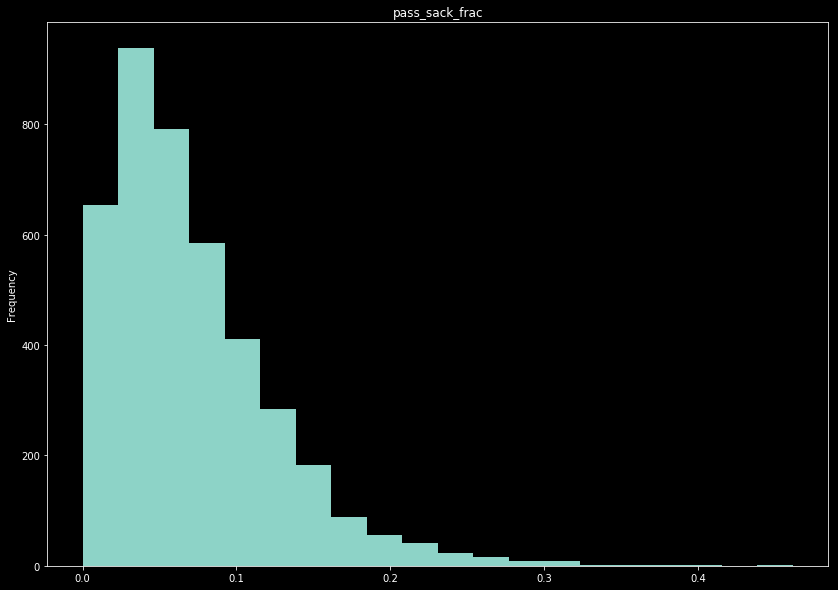

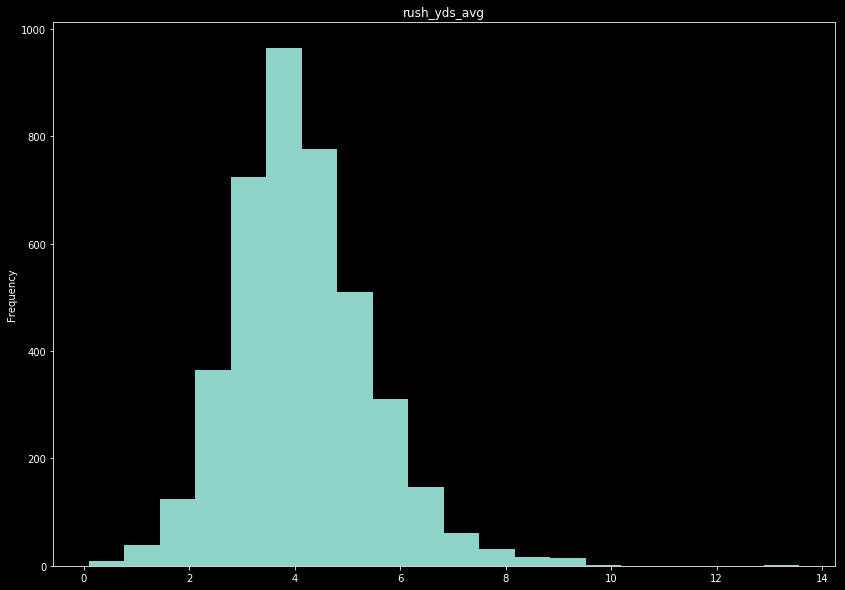

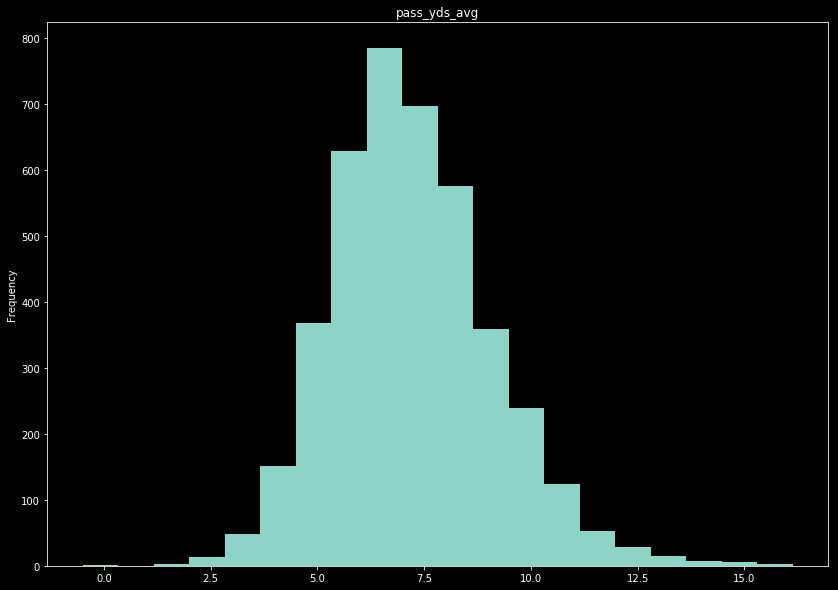

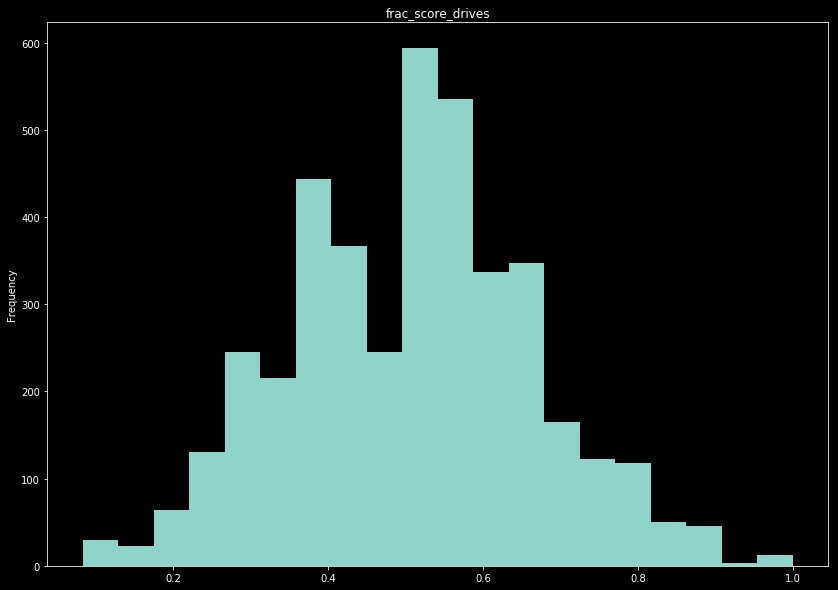

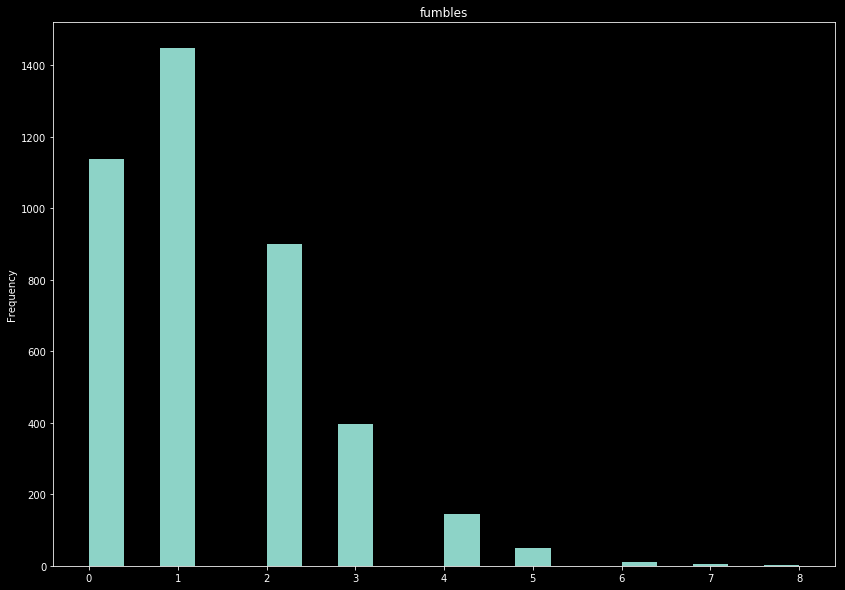

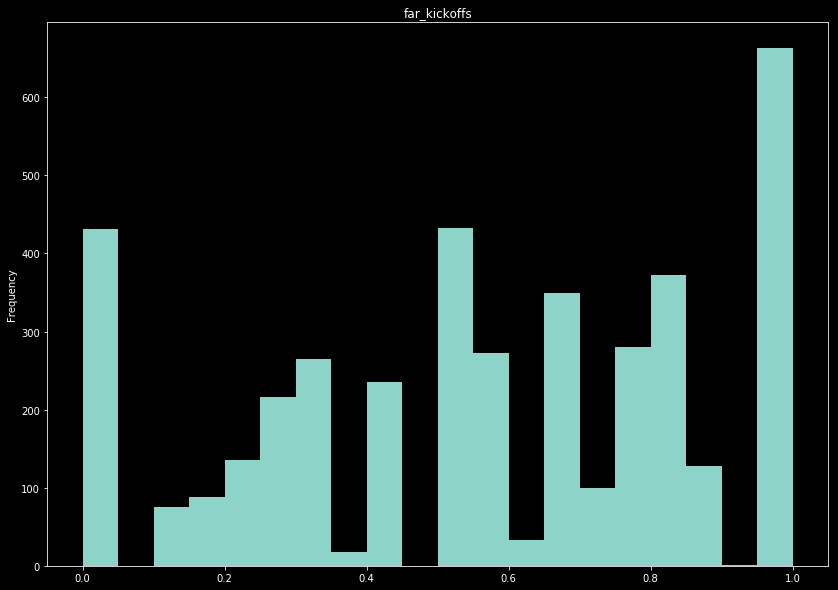

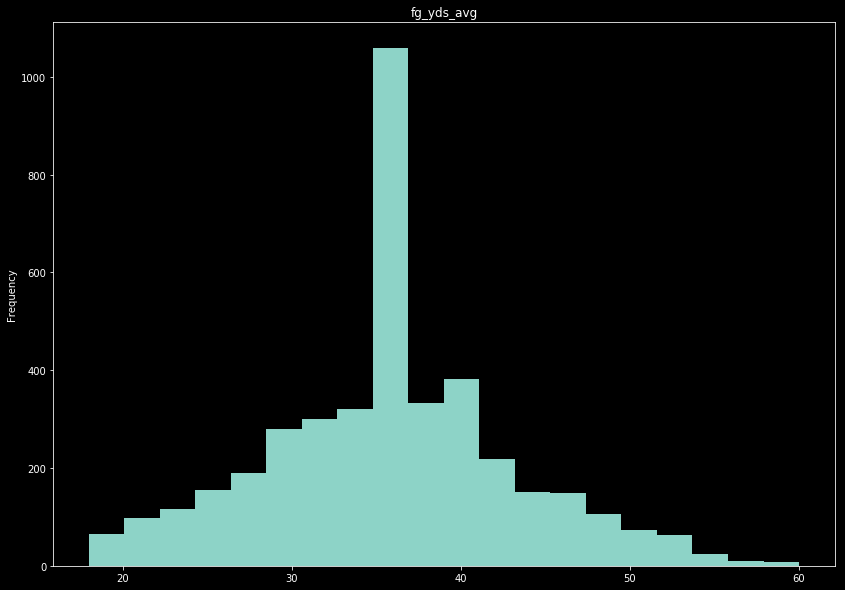

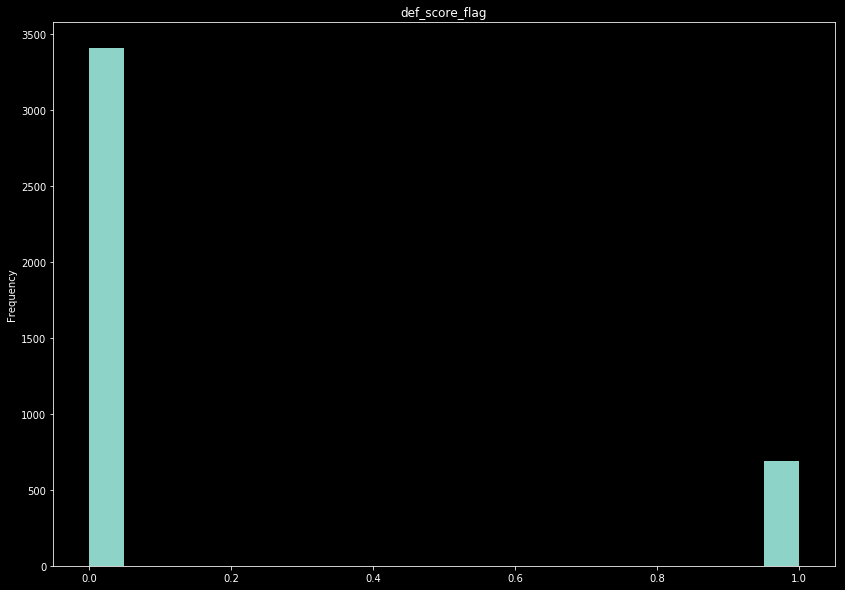

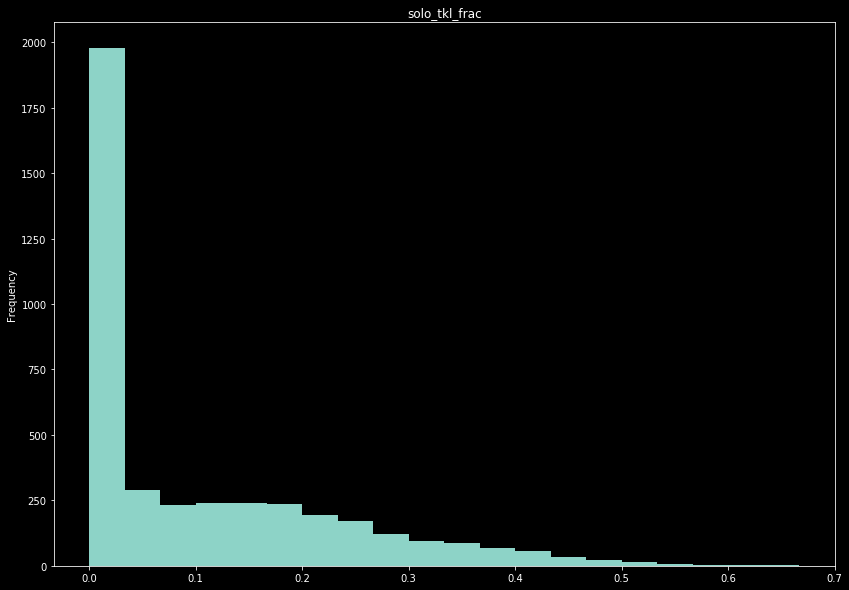

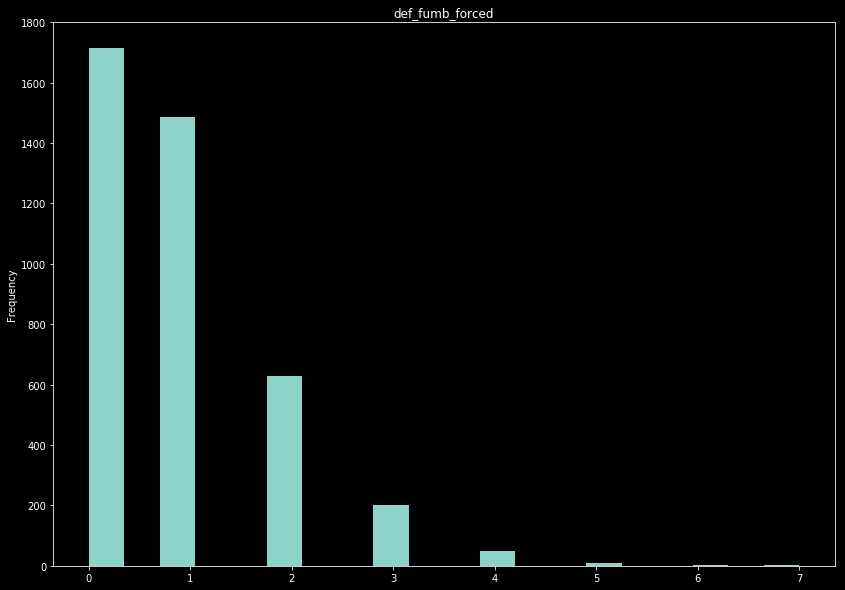

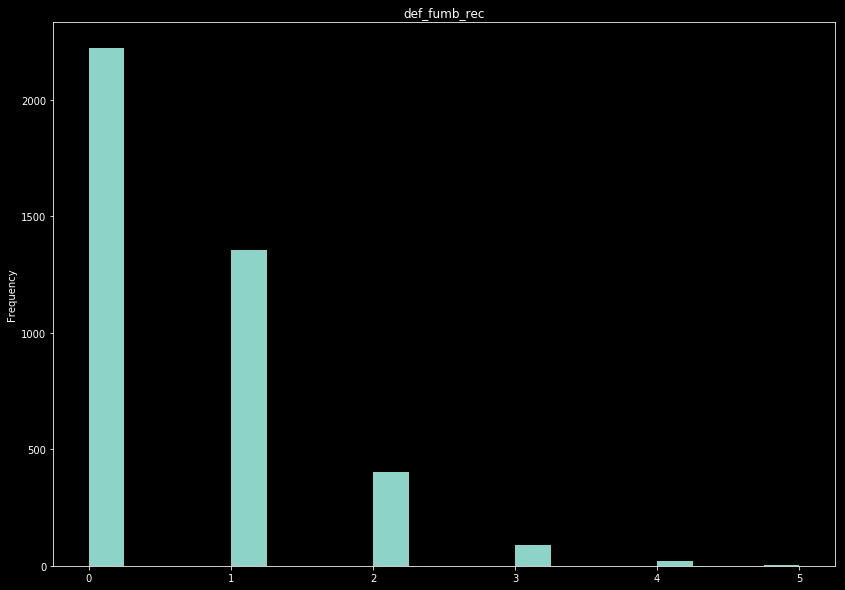

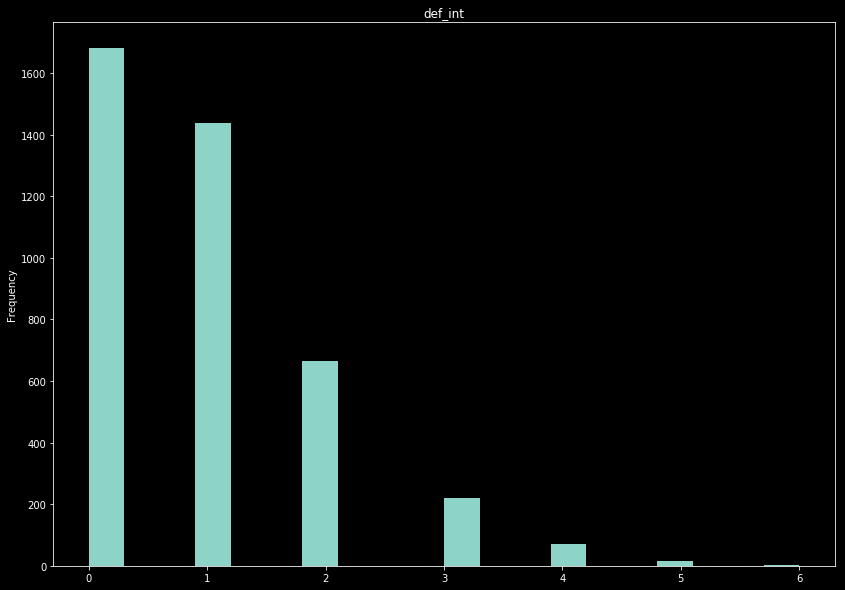

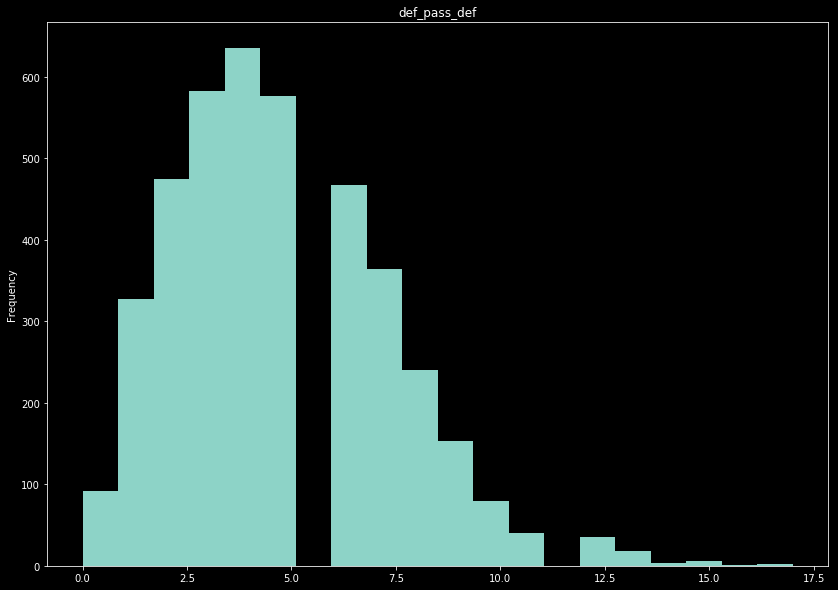

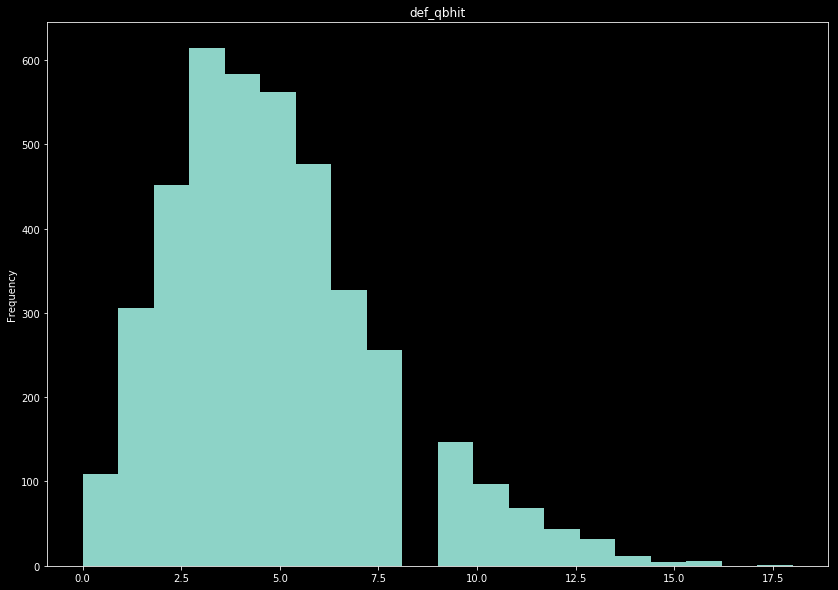

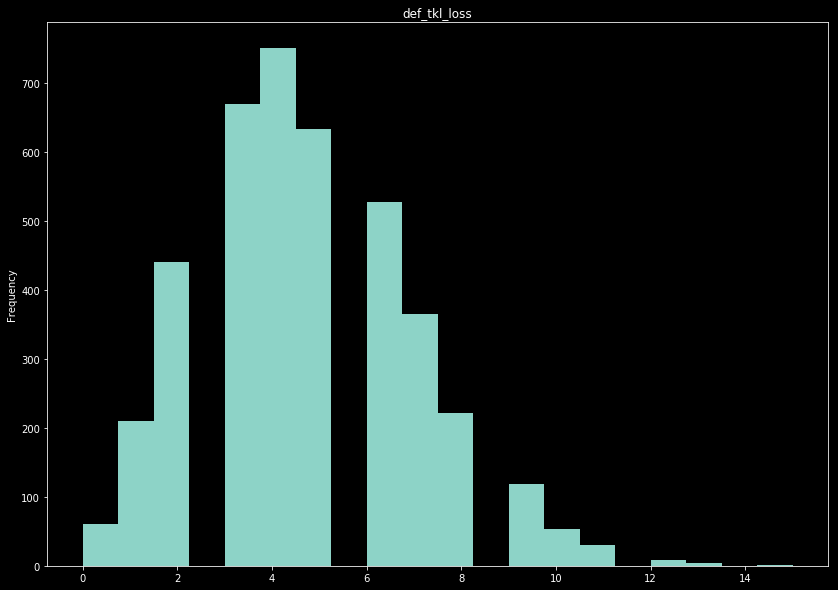

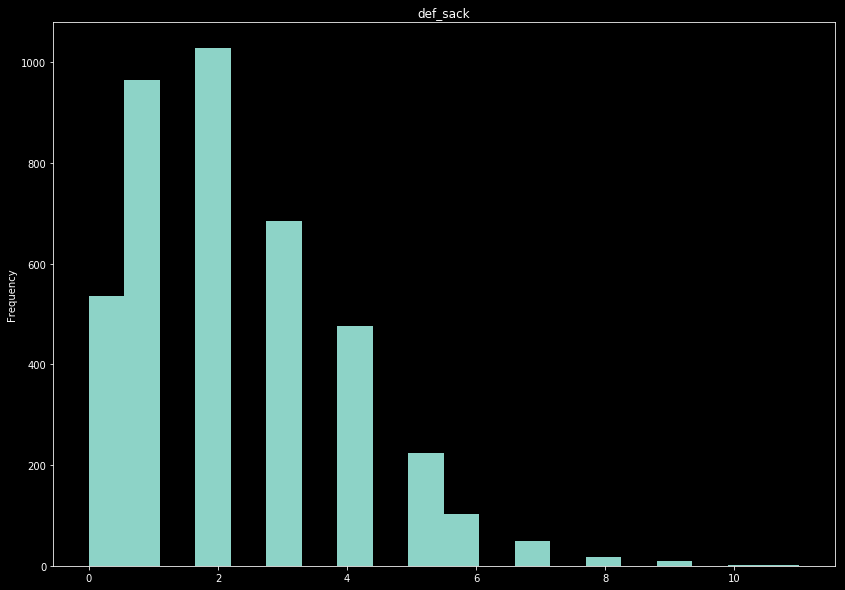

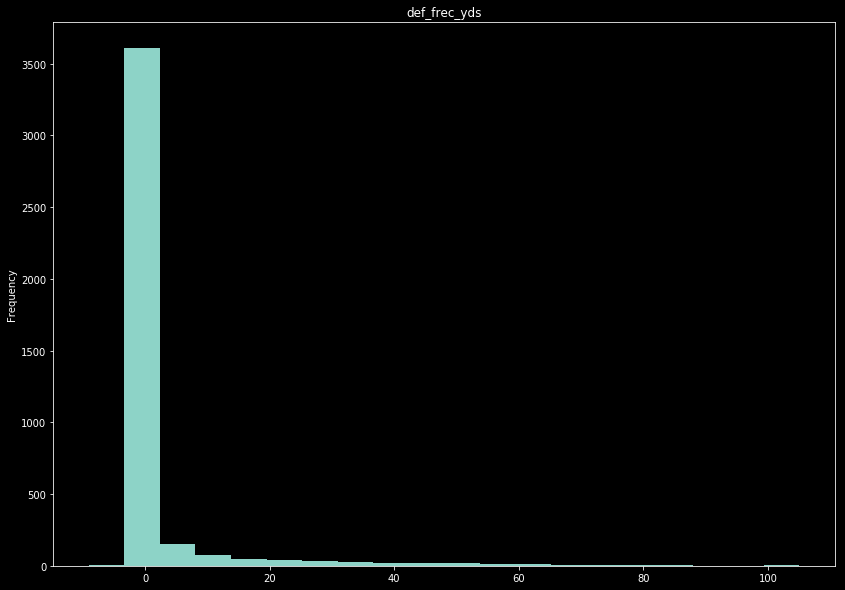

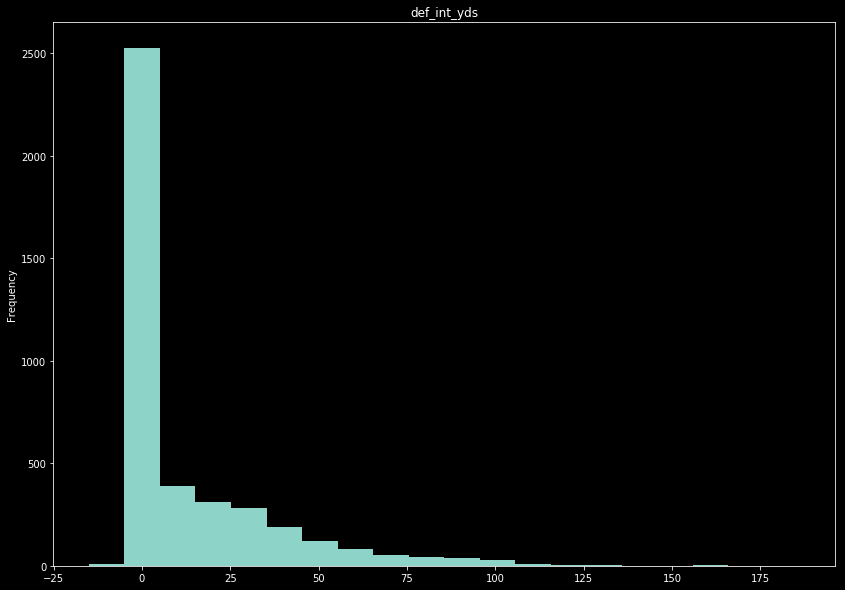

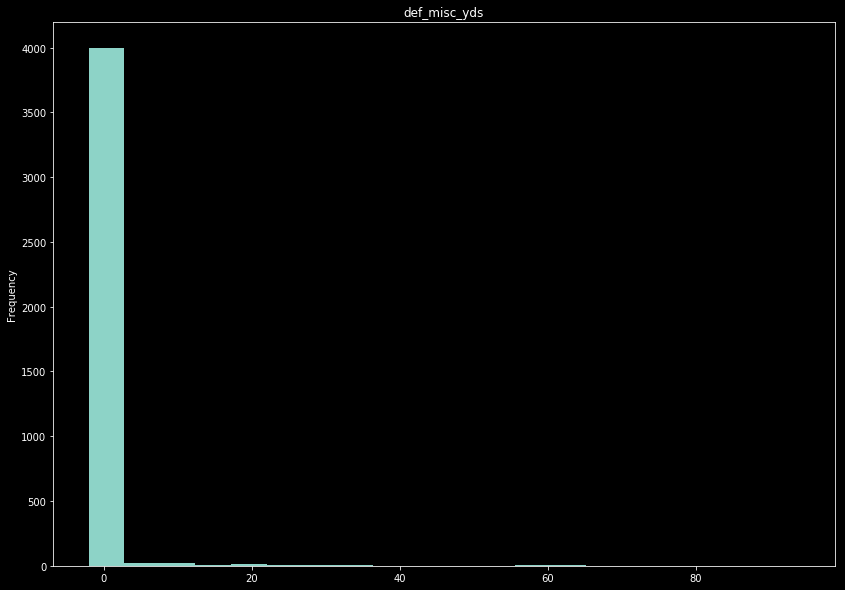

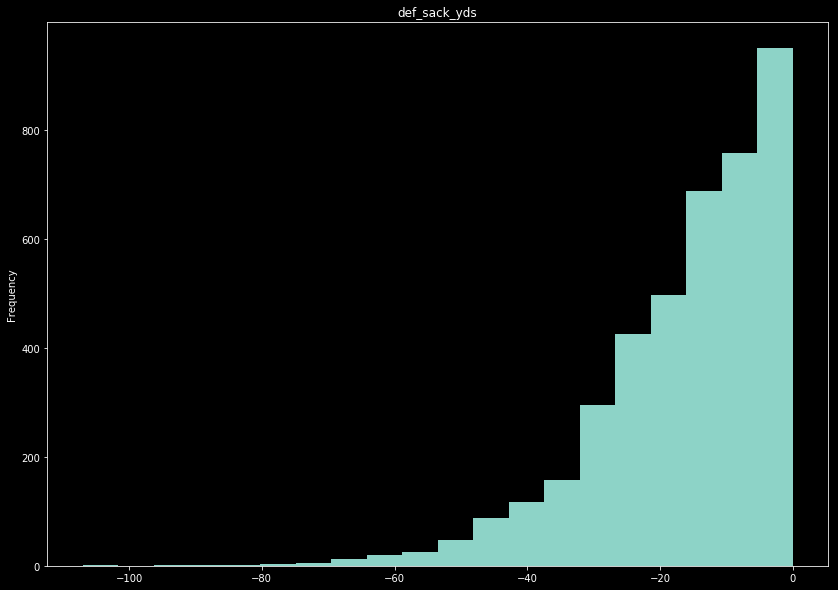

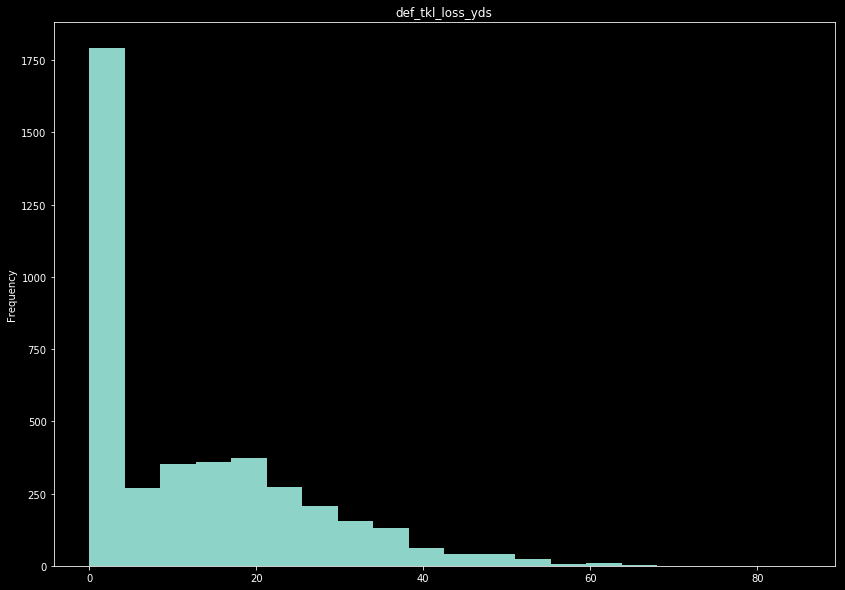

In [44]:
for col in edited_df.columns.values[8:]:
    edited_df[col].plot.hist( bins=20, title=col )
    plt.show()

pca on 

def_turn = [u'def_fumb_forced', u'def_fumb_rec', u'def_int']

def_hits = ['def_qbhit', u'def_tkl_loss','def_sack', 'def_pass_def']

def_yds = [u'def_frec_yds', u'def_int_yds', u'def_misc_yds', u'def_sack_yds', u'def_tkl_loss_yds']

In [4]:
from sklearn.decomposition import PCA

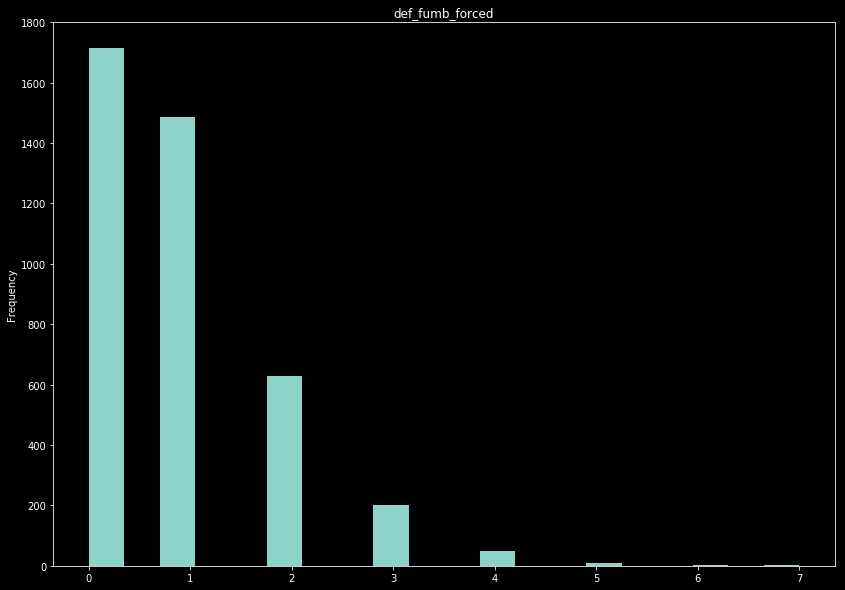

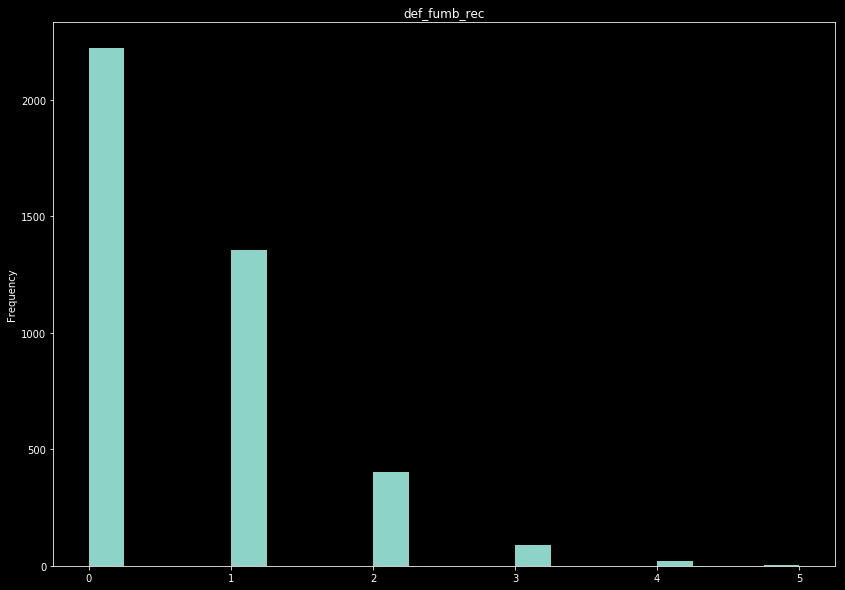

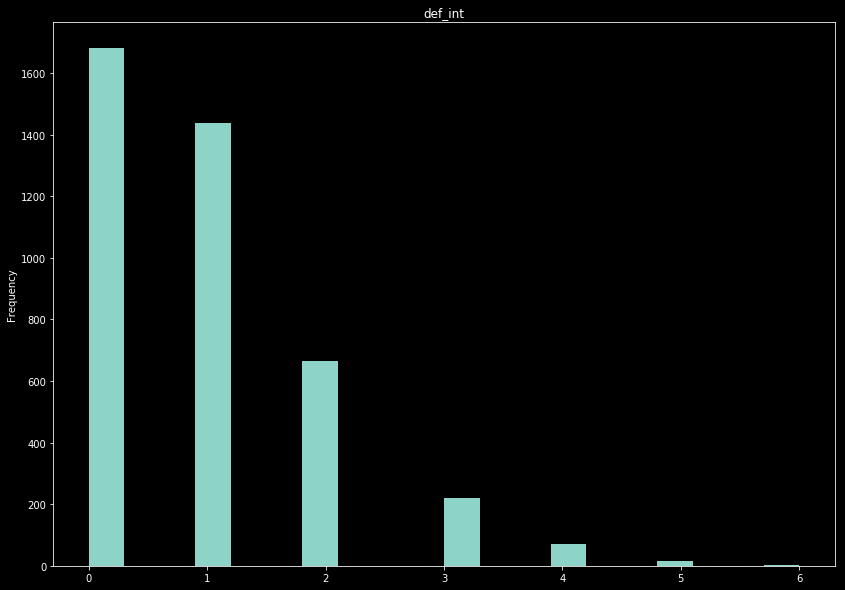

In [12]:
# All are on the same rough scale, lets see PCA overlap
new_frame = edited_df[def_turn]

for col in new_frame:
    new_frame[col].plot.hist( bins=20, title=col )
    plt.show()

In [14]:
turnover_pca = PCA( n_components=3 )
turnover_pca.fit( new_frame )
turnover_pca.explained_variance_ratio_

array([ 0.51837305,  0.38654332,  0.09508363])

In [7]:
new_frame = edited_df[def_turn].copy()

for col in new_frame:
    new_frame[col] = ( new_frame[col] - new_frame[col].min() ) / ( new_frame[col].max() - new_frame[col].min() )

turnover_pca = PCA( n_components=2 )
turnover_pca.fit( new_frame )
turnover_pca.explained_variance_ratio_

array([ 0.51947162,  0.38245949])

In [11]:
foo = turnover_pca.transform( new_frame )
foo[:,0].shape

(4096,)

In [27]:
# No real difference if normalized or not
# Don't worry about normalization
# Take 2

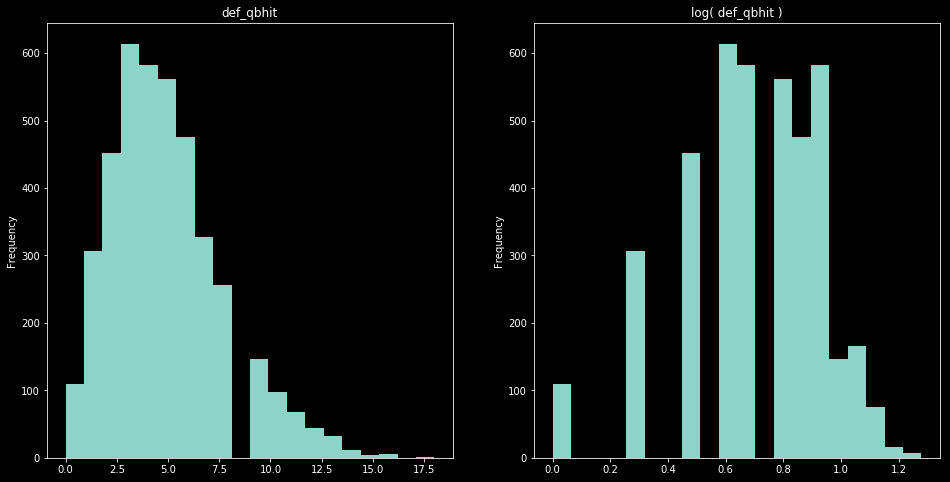

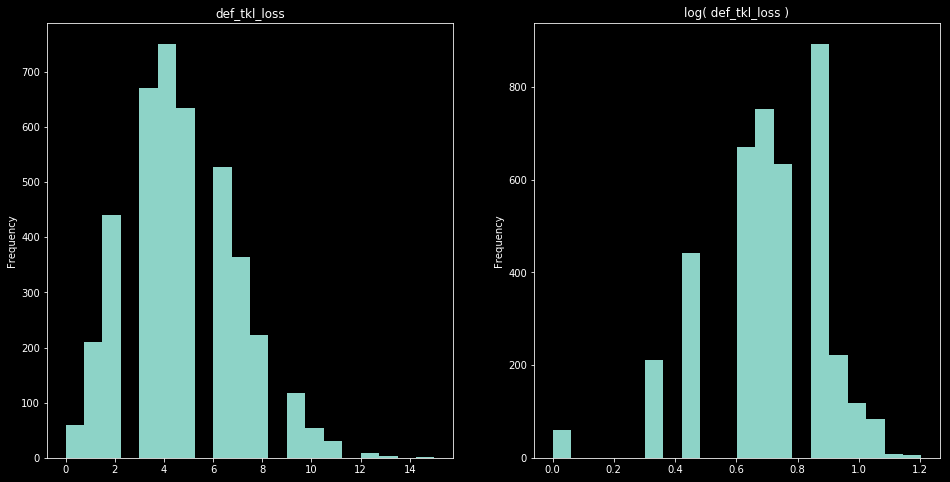

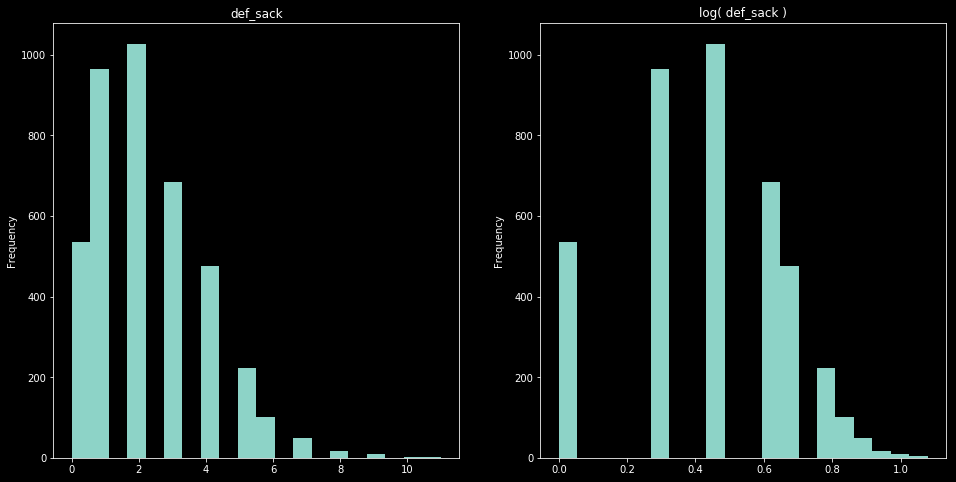

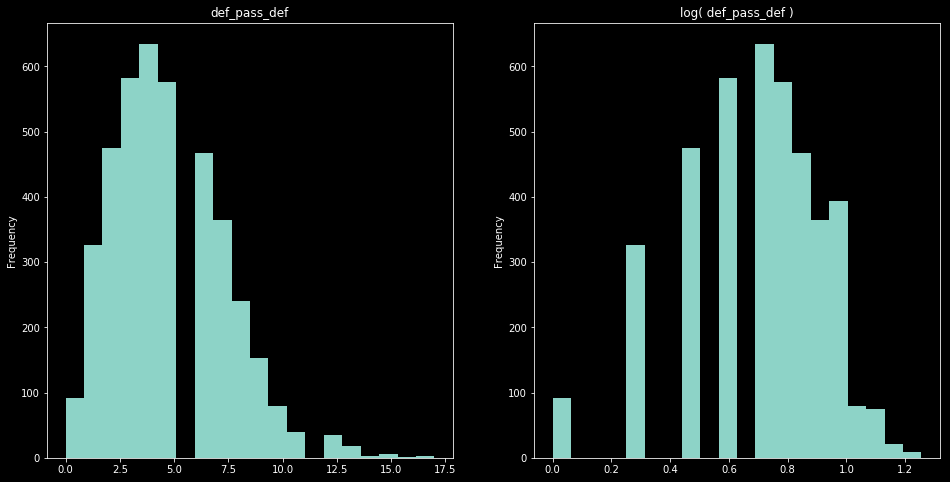

In [14]:
rcParams['figure.figsize'] = 16, 8

# All are on the same rough scale, lets see PCA overlap
new_frame = edited_df[def_hits]

for col in new_frame:
    fig, ax = plt.subplots(1,2)
    new_frame[col].plot.hist( bins=20, title=col, ax=ax[0] )
    np.log10(new_frame[col]+1).plot.hist( bins=20, title='log( '+col+' )', ax=ax[1] )
    plt.show()

In [30]:
turnover_pca = PCA( n_components=4 )
turnover_pca.fit( new_frame )
turnover_pca.explained_variance_ratio_

array([ 0.49149712,  0.29600338,  0.16388445,  0.04861505])

In [31]:
new_frame = edited_df[def_hits].copy()

for col in new_frame:
    new_frame[col] = ( new_frame[col] - new_frame[col].min() ) / ( new_frame[col].max() - new_frame[col].min() )

turnover_pca = PCA( n_components=4 )
turnover_pca.fit( new_frame )
turnover_pca.explained_variance_ratio_

array([ 0.51508248,  0.25797505,  0.15019388,  0.07674859])

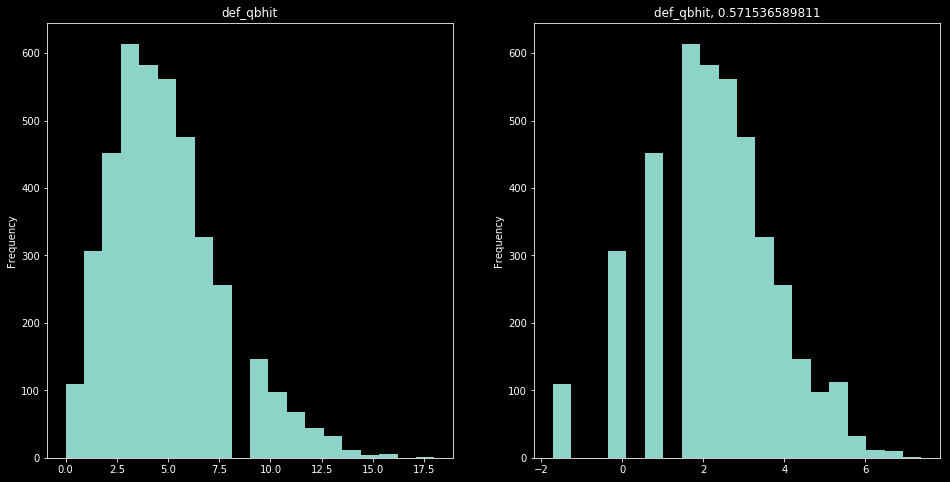

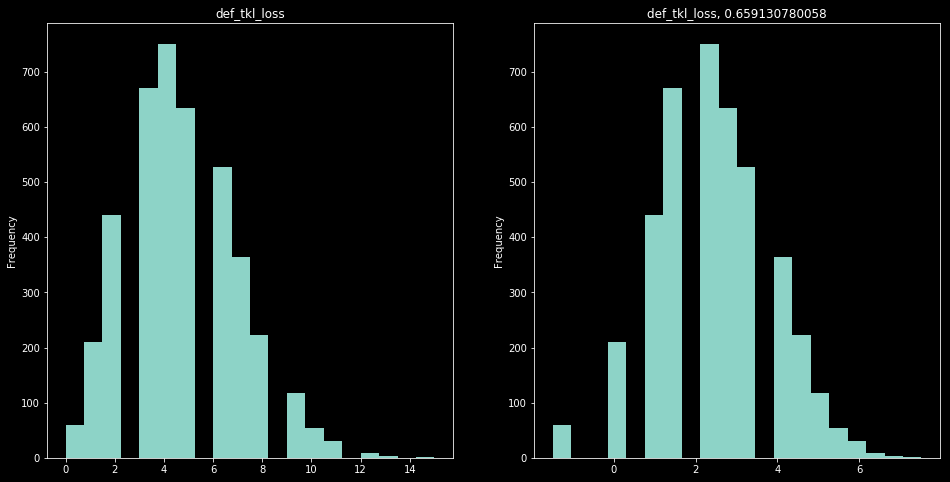

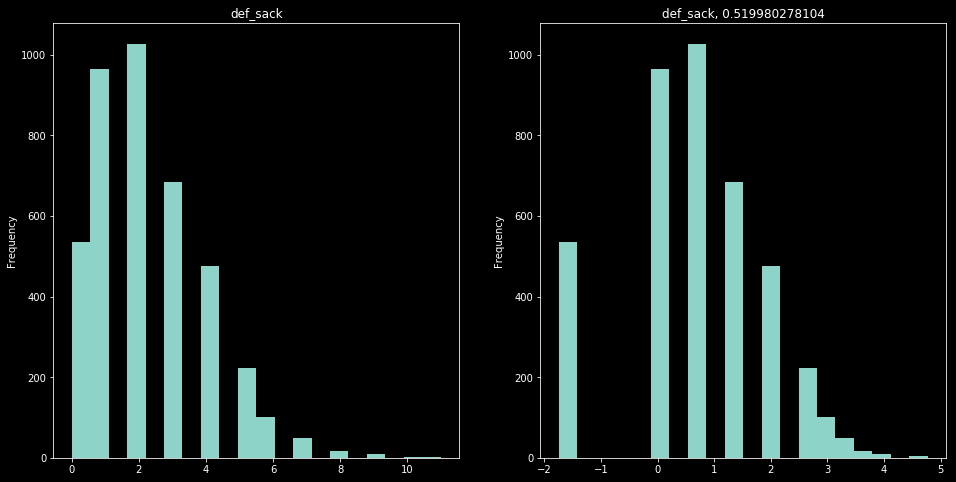

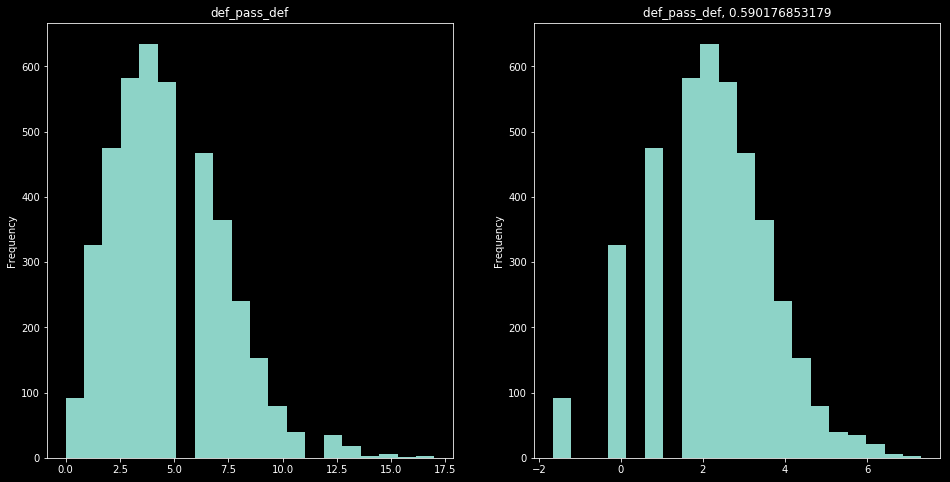

array([ 0.54718012,  0.23050737,  0.13147004,  0.09084247])

In [18]:
rcParams['figure.figsize'] = 16, 8

new_frame = edited_df[def_hits].copy()

for col, addval in zip( new_frame, [10**(-3),1e-3,1e-2,1e-3] ):
    fig, ax = plt.subplots(1,2)
    new_frame[col].plot.hist( title=col, bins=20, ax=ax[0] )
    new_frame[col], lamb = boxcox( new_frame[col]+addval )
    new_frame[col].plot.hist( title=col+', '+str(lamb), bins=20, ax=ax[1] )
    new_frame[col] = ( new_frame[col] - new_frame[col].min() ) / ( new_frame[col].max() - new_frame[col].min() )
    plt.show()

turnover_pca = PCA( n_components=4 )
turnover_pca.fit( new_frame )
turnover_pca.explained_variance_ratio_

In [91]:
# Doesnt make too big a difference whether transform or normalize or what
# Go ahead and leave them in, will just boxcox and normalize later

-9


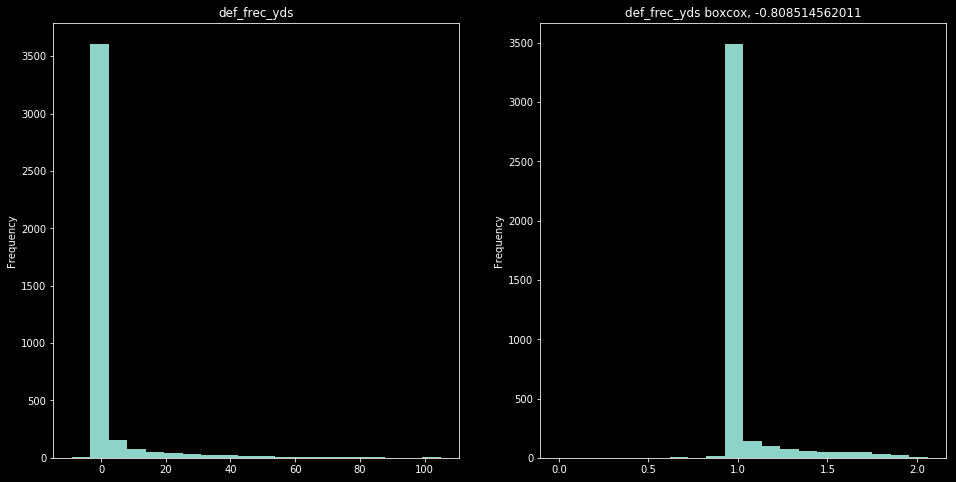

-15


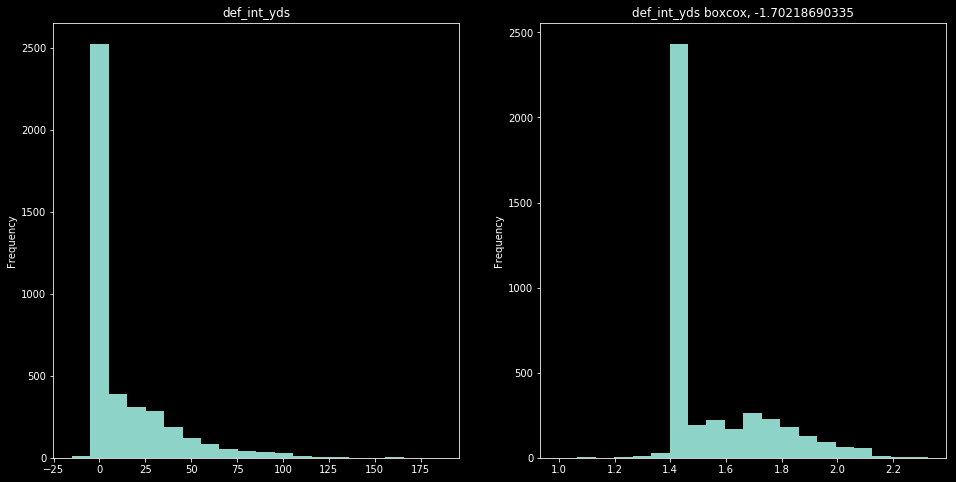

0


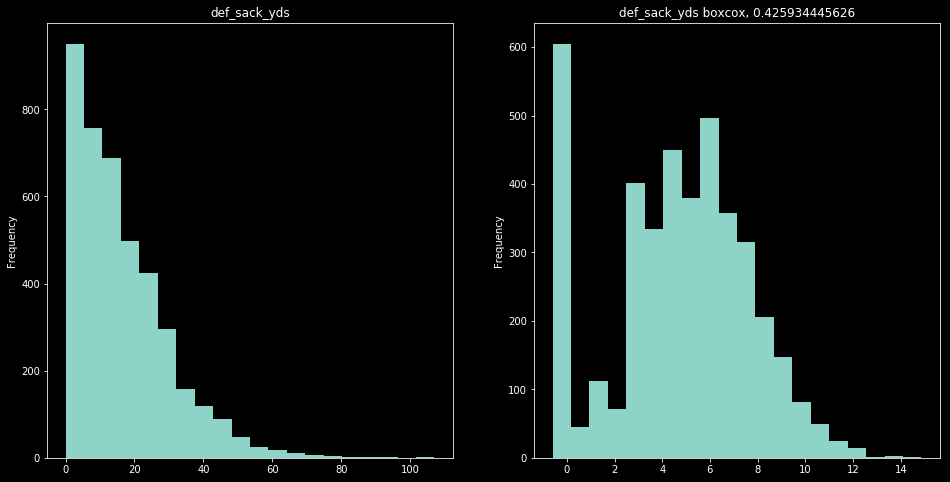

In [128]:
rcParams['figure.figsize'] = 16, 8

# All are on the same rough scale, lets see PCA overlap
new_frame = edited_df[def_yds].drop('def_misc_yds',axis=1).copy()
new_frame['def_sack_yds'] = -new_frame['def_sack_yds']
tra_frame = new_frame.copy()

for col, addval in zip( new_frame, [1e1,25,5e-1]):
    
    print new_frame[col].min()
    tra_frame[col], lamb = boxcox( new_frame[col]+addval )
    if ( addval==10 ):
        tra_frame[col] = np.log10( new_frame[col]+addval )
    if ( addval==25 ):
        tra_frame[col] = np.log10( new_frame[col]+addval )
    
    fig, ax = plt.subplots( 1, 2 )
    new_frame[col].plot.hist( bins=20, title=col, ax=ax[0] )
    tra_frame[col].plot.hist( bins=20, title=col+' boxcox, '+str(lamb), ax=ax[1] )    
        
    plt.show()

In [129]:
# Drop def misc yds, frec yds

Some touching up of the new data frame, don't compress info yet

In [38]:
# Create new df
edited_df = all_team_data[['team','opp_team','week','year', 'score', 'opp_score', 'home_flag', 'away_flag','tds']].copy()


# Offense


# General offensive play breakdowns
#  Have these features, plus make the commented ones
#edited_df['pass_play_frac' ] = all_team_data['pass_att'] / ( all_team_data['pass_att'] + all_team_data['rush_att'] )
#edited_df['off_plays'      ] = all_team_data['pass_att'] +   all_team_data['rush_att']
#edited_df['pass_cmp_frac'  ] = all_team_data['pass_cmp'] /   all_team_data['pass_att']
#edited_df['pass_sack_frac' ] = all_team_data['pass_sack']/   all_team_data['pass_att']
#edited_df['rush_yds_avg'   ] = all_team_data['rush_yds'] /   all_team_data['rush_att']
#edited_df['pass_yds_avg'   ] = all_team_data['pass_yds'] /   all_team_data['pass_att']
edited_df['rush_att' ] = all_team_data['rush_att']
edited_df['rush_yds' ] = all_team_data['rush_yds']
edited_df['pass_att' ] = all_team_data['pass_att']
edited_df['pass_yds' ] = all_team_data['pass_yds']
edited_df['pass_cmp' ] = all_team_data['pass_cmp']
edited_df['pass_sack'] = all_team_data['pass_sack']



# Get info onto offense effectiveness
#  Create features
#edited_df['frac_score_drives'] = all_team_data['kickoffs'] / ( all_team_data['kickoffs'] + 
#                                                               all_team_data['punts'   ] + 
#                                                               all_team_data['fg_miss' ] )
edited_df['kickoffs'] = all_team_data['kickoffs']
edited_df['punts'   ] = all_team_data['punts'   ]
edited_df['fg_miss' ] = all_team_data['fg_miss' ]


# How well off keeps the ball
edited_df['fumbles'         ] = all_team_data['off_fumb_tot'   ]



# Kickoffs that land far,
#  Create w/in 20 yd line or touchbacks
#edited_df['frac_far_kickoffs'] = ( all_team_data['kickoff_in_20'] + 
#                                   all_team_data['kickoff_touchback'] ) / all_team_data['kickoffs']
edited_df['kickoff_in_20'    ] = all_team_data['kickoff_in_20']
edited_df['kickoff_touchback'] = all_team_data['kickoff_touchback']


# How good they are at putting in the kicker
# And how far that is
# Create feature
#edited_df['fg_yds_avg'  ] = all_team_data['fg_yds' ] / all_team_data['fg_made']
edited_df['fg_yds' ] = all_team_data['fg_yds' ]
edited_df['fg_made'] = all_team_data['fg_made']

# No fg made, just go with median
#edited_df['fg_yds_avg'].fillna( edited_df['fg_yds_avg'].median() , inplace=True )


# Defense

# How many scores total
scored_stuff = ['def_int_tds','def_frec_tds','def_misc_tds','def_safety']
edited_df['def_score_flag'] = 0
edited_df.loc[all_team_data[scored_stuff].sum(axis=1)>0,'def_score_flag'] = 1

# Can defense do a good job one on one, 
#  or does whole D need to tackle one guy
#edited_df['solo_tkl_frac'] = all_team_data['def_tkl']/all_team_data['def_tkl_contributers']
edited_df['def_tkl'] = all_team_data['def_tkl']
edited_df['def_tkl_contributers'] = all_team_data['def_tkl_contributers']

# Defensive turnovers, just take 2
def_turn = [u'def_fumb_forced', u'def_int']
edited_df[def_turn] = all_team_data[def_turn]



# Pressure
def_hits = [u'def_tkl_loss','def_sack', 'def_pass_def']
edited_df[def_hits] = all_team_data[def_hits].astype(int)


# Stuff to consider from opposing team
opp_team_stuff = [
                  'rush_att', 
                  'rush_yds', 
                  'pass_att',
                  'pass_yds', 
                  'pass_cmp', 
                  'pass_sack', 
                  'kickoffs', 
                  'punts', 
                  'fumbles', 
                  'def_tkl', 
                  'def_tkl_contributers',
                  'def_sack',
                  'def_pass_def'
                 ]

# Rename opposing team stuff
renamed_frame = edited_df[[u'week', 'year']].copy()
renamed_frame['opp_team'] = edited_df['team']
for col in opp_team_stuff:
    renamed_frame['opp_'+col] = edited_df[col]

# Add the opposing team stuff
full_df = pd.merge( edited_df, 
                    renamed_frame, 
                    how='left', 
                    left_on=['opp_team','week','year'],
                    right_on=['opp_team','week','year'], )
full_df.head(20)

In [34]:
edited_df.head()

,team,opp_team,week,year,score,opp_score,home_flag,away_flag,rush_att,rush_yds,...,fg_yds,fg_made,def_score_flag,def_tkl,def_tkl_contributers,def_fumb_forced,def_int,def_tkl_loss,def_sack,def_pass_def
0,ARI,SF,1,2009,16.0,20.0,1,0,17,40,...,116,3,0,7,52,0,0,11,3,5
1,ARI,JAC,2,2009,31.0,17.0,0,1,28,118,...,45,1,1,0,46,4,1,7,4,3
2,ARI,IND,3,2009,10.0,31.0,1,0,12,24,...,38,1,0,7,55,0,1,5,0,5
3,ARI,HOU,5,2009,28.0,21.0,1,0,16,44,...,0,0,1,8,62,0,1,3,0,3
4,ARI,SEA,6,2009,27.0,3.0,0,1,26,62,...,60,2,0,1,34,1,1,8,5,8


In [35]:
edited_df.shape

(4096, 30)

In [36]:
edited_df.columns.values

array([u'team', 'opp_team', u'week', 'year', 'score', 'opp_score',
       'home_flag', 'away_flag', 'rush_att', 'rush_yds', 'pass_att',
       'pass_yds', 'pass_cmp', 'pass_sack', 'kickoffs', 'punts', 'fg_miss',
       'fumbles', 'kickoff_in_20', 'kickoff_touchback', 'fg_yds',
       'fg_made', 'def_score_flag', 'def_tkl', 'def_tkl_contributers',
       u'def_fumb_forced', u'def_int', u'def_tkl_loss', 'def_sack',
       'def_pass_def'], dtype=object)

Sitting with 20 interesting features about the game. Can bring over some features from other team, like opponents pass defense vs number of passing plays, for more features

,team,opp_team,week,year,score,opp_score,home_flag,away_flag,tds,rush_att,...,opp_pass_yds,opp_pass_cmp,opp_pass_sack,opp_kickoffs,opp_punts,opp_fumbles,opp_def_tkl,opp_def_tkl_contributers,opp_def_sack,opp_def_pass_def
0,ARI,SF,1,2009,16.0,20.0,1,0,1,17,...,209,18,4,5,8,1,10,52,3,8
1,ARI,JAC,2,2009,31.0,17.0,0,1,4,28,...,282,23,4,4,4,4,0,51,0,1
2,ARI,IND,3,2009,10.0,31.0,1,0,1,12,...,379,24,0,6,4,1,12,56,4,6
3,ARI,HOU,5,2009,28.0,21.0,1,0,4,16,...,371,35,0,4,5,1,10,44,1,6
4,ARI,SEA,6,2009,27.0,3.0,0,1,3,26,...,154,11,5,2,8,2,3,64,2,4
5,ARI,NYG,7,2009,24.0,17.0,0,1,3,22,...,243,19,3,4,7,2,21,46,2,9
6,ARI,CAR,8,2009,21.0,34.0,1,0,3,17,...,90,7,1,7,6,0,12,52,2,14
7,ARI,CHI,9,2009,41.0,21.0,0,1,5,31,...,369,29,4,4,4,0,11,59,1,2
8,ARI,SEA,10,2009,31.0,20.0,1,0,4,30,...,331,27,4,5,7,0,8,59,0,3
9,ARI,STL,11,2009,21.0,13.0,0,1,3,30,...,215,19,3,4,4,2,4,58,2,2


In [38]:
full_df.drop(['week','year','home_flag','away_flag'],axis=1).corr()

,score,opp_score,pass_play_frac,off_plays,pass_cmp_frac,pass_sack_frac,rush_yds_avg,pass_yds_avg,frac_score_drives,fumbles,...,def_sack,def_pass_def,opp_pass_play_frac,opp_rush_yds_avg,opp_pass_yds_avg,opp_frac_score_drives,opp_far_kickoffs,opp_solo_tkl_frac,opp_def_sack,opp_def_pass_def
score,1.000000,-0.093800,-0.311060,0.273673,0.403918,-0.280176,0.181696,0.564269,0.735525,-0.151276,...,0.165844,0.296058,0.447633,0.049819,-0.097807,-0.055769,-0.017375,0.005317,-0.322336,-0.291038
opp_score,-0.093800,1.000000,0.447633,-0.048692,-0.140612,0.060722,0.049819,-0.097807,-0.055769,0.140517,...,-0.322336,-0.291038,-0.311060,0.181696,0.564269,0.735525,0.073376,-0.028568,0.165844,0.296058
pass_play_frac,-0.311060,0.447633,1.000000,0.016049,-0.095608,-0.076026,-0.215975,-0.239974,-0.235550,0.081554,...,-0.220588,-0.264092,-0.361984,0.041137,0.297830,0.314945,0.130354,-0.105749,0.193793,0.456382
off_plays,0.273673,-0.048692,0.016049,1.000000,0.076257,-0.363550,-0.016071,-0.002238,0.263688,0.019583,...,0.016366,0.075410,0.194888,0.014362,-0.048161,-0.200559,0.097454,-0.015757,-0.179484,0.195785
pass_cmp_frac,0.403918,-0.140612,-0.095608,0.076257,1.000000,-0.095436,-0.042364,0.565989,0.457102,-0.066814,...,0.020595,0.041176,0.259907,0.059923,-0.022284,0.027585,0.065520,-0.030281,-0.113540,-0.450183
pass_sack_frac,-0.280176,0.060722,-0.076026,-0.363550,-0.095436,1.000000,0.005016,-0.072382,-0.296898,0.115652,...,-0.000047,-0.071394,-0.158869,-0.036344,0.015544,0.004693,-0.019791,-0.030249,0.908364,-0.068496
rush_yds_avg,0.181696,0.049819,-0.215975,-0.016071,-0.042364,0.005016,1.000000,-0.016648,0.177023,-0.018278,...,-0.018124,0.001607,0.041137,0.028792,0.024587,0.045906,-0.029943,0.013744,-0.045460,-0.066907
pass_yds_avg,0.564269,-0.097807,-0.239974,-0.002238,0.565989,-0.072382,-0.016648,1.000000,0.521236,-0.075898,...,0.080900,0.122471,0.297830,0.024587,-0.033694,-0.007652,0.047639,-0.005870,-0.137366,-0.341628
frac_score_drives,0.735525,-0.055769,-0.235550,0.263688,0.457102,-0.296898,0.177023,0.521236,1.000000,-0.098465,...,0.040404,0.094741,0.314945,0.045906,-0.007652,0.116528,-0.016146,0.016657,-0.320094,-0.255751
fumbles,-0.151276,0.140517,0.081554,0.019583,-0.066814,0.115652,-0.018278,-0.075898,-0.098465,1.000000,...,-0.025323,-0.035231,-0.135630,-0.057651,-0.007948,0.005961,-0.032609,-0.003162,0.144749,0.066619


In [42]:
full_df.columns.values[8:]

array(['pass_play_frac', 'off_plays', 'pass_cmp_frac', 'pass_sack_frac',
       'rush_yds_avg', 'pass_yds_avg', 'frac_score_drives', 'fumbles',
       'far_kickoffs', 'fg_yds_avg', 'def_score_flag', 'solo_tkl_frac',
       u'def_fumb_forced', u'def_int', u'def_tkl_loss', 'def_sack',
       'def_pass_def', 'opp_pass_play_frac', 'opp_rush_yds_avg',
       'opp_pass_yds_avg', 'opp_frac_score_drives', 'opp_far_kickoffs',
       'opp_solo_tkl_frac', 'opp_def_sack', 'opp_def_pass_def'], dtype=object)

In [57]:
full_df.dtypes

team                      object
opp_team                  object
week                       int64
year                       int64
score                    float64
opp_score                float64
home_flag                  int64
away_flag                  int64
pass_play_frac           float64
off_plays                  int64
pass_cmp_frac            float64
pass_sack_frac           float64
rush_yds_avg             float64
pass_yds_avg             float64
rush_yds                   int64
pass_yds                   int64
frac_score_drives        float64
fumbles                    int64
frac_far_kickoffs        float64
fg_yds_avg               float64
def_score_flag             int64
solo_tkl_frac            float64
def_fumb_forced            int64
def_int                    int64
def_tkl_loss               int64
def_sack                   int64
def_pass_def               int64
opp_pass_play_frac       float64
opp_rush_yds               int64
opp_pass_yds               int64
opp_frac_s

In [58]:
for col in ['off_plays','def_fumb_forced','def_int','def_tkl_loss','def_pass_def','def_sack']:
    print col, sorted( full_df[col].unique() )

off_plays [8, 15, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91]
def_fumb_forced [0, 1, 2, 3, 4, 5, 6, 7]
def_int [0, 1, 2, 3, 4, 5, 6]
def_tkl_loss [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15]
def_pass_def [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]
def_sack [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


In [12]:
all_team_data = pd.concat( [pre_team_data,reg_team_data] )

In [20]:
foo = all_team_data.loc[ (all_team_data['year']==2010) & (all_team_data['team']=='ARI') ].sort_values('week')
print foo.head(10)

foo[['def_fumb_forced']].rolling(4).sum().shift(1)

    team  week  def_fumb_forced  def_fumb_rec  def_frec_yds  def_frec_tds  \
130  ARI    -3                2             2            -1             0   
131  ARI    -2                0             0             0             0   
132  ARI    -1                1             0             0             0   
133  ARI     0                0             0             0             0   
512  ARI     1                2             2             0             0   
513  ARI     2                1             1             0             0   
514  ARI     3                1             0             0             0   
515  ARI     4                1             1            42             1   
516  ARI     5                2             1            27             1   
517  ARI     7                1             1             0             0   

     def_fg_blk  def_xp_blk  def_punt_blk  def_int  ...   \
130           0           0             0        0  ...    
131           0           0     

,def_fumb_forced
130,NaN
131,NaN
132,NaN
133,NaN
512,3.0
513,3.0
514,4.0
515,4.0
516,5.0
517,5.0


In [32]:
# Create new df
edited_df = all_team_data[['team','opp_team','week','year', 'score', 'opp_score', 'home_flag', 'away_flag','tds']].copy()


# Offense


# General offensive play breakdowns
#  Have these features, plus make the commented ones
edited_df['rush_att' ] = all_team_data['rush_att']
edited_df['rush_yds' ] = all_team_data['rush_yds']
edited_df['pass_att' ] = all_team_data['pass_att']
edited_df['pass_yds' ] = all_team_data['pass_yds']
edited_df['pass_cmp' ] = all_team_data['pass_cmp']
edited_df['pass_sack'] = all_team_data['pass_sack']



# Get info onto offense effectiveness
#  Create features
edited_df['kickoffs'] = all_team_data['kickoffs']
edited_df['punts'   ] = all_team_data['punts'   ]
edited_df['fg_miss' ] = all_team_data['fg_miss' ]


# How well off keeps the ball
edited_df['fumbles'         ] = all_team_data['off_fumb_tot'   ]



# Kickoffs that land far,
#  Create w/in 20 yd line or touchbacks
edited_df['kickoff_in_20'    ] = all_team_data['kickoff_in_20']
edited_df['kickoff_touchback'] = all_team_data['kickoff_touchback']


# How good they are at putting in the kicker
# And how far that is
# Create feature
edited_df['fg_yds' ] = all_team_data['fg_yds' ]
edited_df['fg_made'] = all_team_data['fg_made']


# Defense

# How many scores total
scored_stuff = ['def_int_tds','def_frec_tds','def_misc_tds','def_safety']
edited_df['def_score_flag'] = 0
edited_df.loc[all_team_data[scored_stuff].sum(axis=1)>0,'def_score_flag'] = 1

# Can defense do a good job one on one, 
#  or does whole D need to tackle one guy
edited_df['def_tkl'] = all_team_data['def_tkl']
edited_df['def_tkl_contributers'] = all_team_data['def_tkl_contributers']

# Defensive turnovers, just take 2
def_turn = [u'def_fumb_forced', u'def_int']
edited_df[def_turn] = all_team_data[def_turn]


# Pressure
def_hits = [u'def_tkl_loss','def_sack', 'def_pass_def']
edited_df[def_hits] = all_team_data[def_hits].astype(int)

In [129]:
def calc_prev_stats( 
                    inp_df   , # Dataframe containing preseason/regular season stuff 
                    use_cols , # Column names to do sums for
                    n_wk=4   , # Number of weeks to perform calculation. Def 4 ( num of preseason games )
                   ):
    
    # Generate new column names, use_cols + _prev_ndays
    new_cols = [str(col) + '_prev_' + str(n_days) for col in use_cols]

    # Output frame,
    #  just set up columns and indexes,
    #  will return these columns
    new_frame = pd.DataFrame( index=inp_df.index, columns=new_cols )

    # The year range
    min_year = min( inp_df['year'].unique() )
    max_year = max( inp_df['year'].unique() )
    
    for     year in range( min_year, max_year+1 ): # Consider each year
        
        yr_ind = ( inp_df['year'] == year )
        
        for team in         inp_df['team'].unique(): #  and team seperately

            # Index we are interested in
            ind = ( yr_ind ) & ( inp_df['team']==team )

            # Take the values we are interested for our team and year,
            # sum the values for the week range
            # shift so values are the previous n day sum
            sum_vals = inp_df.loc[ind].sort_values('week')[use_cols].rolling(n_wk).sum().shift(1)

            new_frame.loc[ind] = sum_vals

    return new_frame

In [168]:
def calc_prev_stats2( 
                    inp_df   , # Dataframe containing preseason/regular season stuff 
                    use_cols , # Column names to do sums for
                    n_wk=4   , # Number of weeks to perform calculation. Def 4 ( num of preseason games )
                   ):
    
    # Generate new column names, use_cols + _prev_ndays
    new_cols = [str(col) + '_prev_' + str(n_days) for col in use_cols]

    # Make sure we include week, for indexing purposes
    if ( type( use_cols ) == np.ndarray ):
        use_cols = use_cols.tolist()
#    use_cols = use_cols + ['week']
    
    
    # Output frame,
    #  just set up columns and indexes,
    #  will return these columns
    new_frame = pd.DataFrame( index=inp_df.index, columns=new_cols )

    foo = ( inp_df.groupby(['team','year'], 
                           as_index=False, 
                           group_keys=False )
                           [use_cols]
                           .rolling( n_wk )
                           .sum()
                           .shift(1) )

    foo.columns = new_cols
    return foo

#calc_prev_stats2( inp_df, inp_df.columns.values[4:] )
bar = calc_prev_stats2( inp_df, inp_df.columns.values[4:] )
bar = pd.concat( [inp_df, new_frame], axis=1 )
bar = bar.loc[ bar['week']>0 ]
bar[['team','year','week','opp_team','tds','tds_prev_4','score_prev_4','opp_score_prev_4']].head(20)

,team,year,week,opp_team,tds,tds_prev_4,score_prev_4,opp_score_prev_4
0,ARI,2009,1,SF,1,6,53,100
1,ARI,2009,2,JAC,4,6,59,100
2,ARI,2009,3,IND,1,10,84,100
3,ARI,2009,5,HOU,4,6,57,87
4,ARI,2009,6,SEA,3,10,85,89
5,ARI,2009,7,NYG,3,12,96,72
6,ARI,2009,8,CAR,3,11,89,72
7,ARI,2009,9,CHI,5,13,100,75
8,ARI,2009,10,SEA,4,14,113,75
9,ARI,2009,11,STL,3,15,117,92


In [134]:
new_frame = calc_prev_stats( inp_df, inp_df.columns.values[4:] )
foo = pd.concat( [inp_df, new_frame], axis=1 )
foo = foo.loc[ foo['week']>0 ]
foo[['team','year','week','opp_team','tds','tds_prev_4','score_prev_4','opp_score_prev_4']].head(20)

,team,year,week,opp_team,tds,tds_prev_4,score_prev_4,opp_score_prev_4
0,ARI,2009,1,SF,1,6,53,100
1,ARI,2009,2,JAC,4,6,59,100
2,ARI,2009,3,IND,1,10,84,100
3,ARI,2009,5,HOU,4,6,57,87
4,ARI,2009,6,SEA,3,10,85,89
5,ARI,2009,7,NYG,3,12,96,72
6,ARI,2009,8,CAR,3,11,89,72
7,ARI,2009,9,CHI,5,13,100,75
8,ARI,2009,10,SEA,4,14,113,75
9,ARI,2009,11,STL,3,15,117,92


In [171]:
( foo.dropna() == bar.dropna() ).all()

team                           True
opp_team                       True
week                           True
year                           True
score                          True
opp_score                      True
home_flag                      True
away_flag                      True
tds                            True
rush_att                       True
rush_yds                       True
pass_att                       True
pass_yds                       True
pass_cmp                       True
pass_sack                      True
kickoffs                       True
punts                          True
fg_miss                        True
fumbles                        True
kickoff_in_20                  True
kickoff_touchback              True
fg_yds                         True
fg_made                        True
def_score_flag                 True
def_tkl                        True
def_tkl_contributers           True
def_fumb_forced                True
def_int                     

In [52]:
sum_vals

,score,opp_score,home_flag,away_flag,tds,rush_att,rush_yds,pass_att,pass_yds,pass_cmp,...,fg_yds,fg_made,def_score_flag,def_tkl,def_tkl_contributers,def_fumb_forced,def_int,def_tkl_loss,def_sack,def_pass_def
130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
132,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
133,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
512,63.0,59.0,2.0,2.0,8.0,97.0,295.0,126.0,916.0,79.0,...,83.0,3.0,0.0,21.0,205.0,3.0,3.0,18.0,9.0,12.0
513,61.0,56.0,1.0,3.0,7.0,97.0,339.0,133.0,992.0,77.0,...,105.0,4.0,1.0,11.0,213.0,3.0,6.0,19.0,10.0,14.0
514,58.0,73.0,1.0,3.0,7.0,91.0,392.0,126.0,922.0,73.0,...,86.0,3.0,1.0,11.0,230.0,4.0,6.0,20.0,10.0,17.0
515,68.0,87.0,2.0,2.0,8.0,92.0,424.0,121.0,770.0,64.0,...,128.0,4.0,1.0,22.0,246.0,4.0,5.0,21.0,9.0,23.0
516,58.0,118.0,1.0,3.0,7.0,74.0,396.0,129.0,729.0,67.0,...,117.0,3.0,2.0,35.0,251.0,5.0,4.0,20.0,7.0,20.0
517,71.0,125.0,2.0,2.0,8.0,78.0,325.0,117.0,612.0,64.0,...,205.0,5.0,2.0,45.0,237.0,5.0,4.0,20.0,6.0,24.0


In [ ]:
# Stuff to consider from opposing team
opp_team_stuff = [
                  'rush_att', 
                  'rush_yds', 
                  'pass_att',
                  'pass_yds', 
                  'pass_cmp', 
                  'pass_sack', 
                  'kickoffs', 
                  'punts', 
                  'fumbles', 
                  'def_tkl', 
                  'def_tkl_contributers',
                  'def_sack',
                  'def_pass_def'
                 ]

# Rename opposing team stuff
renamed_frame = edited_df[[u'week', 'year']].copy()
renamed_frame['opp_team'] = edited_df['team']
for col in opp_team_stuff:
    renamed_frame['opp_'+col] = edited_df[col]

# Add the opposing team stuff
full_df = pd.merge( edited_df, 
                    renamed_frame, 
                    how='left', 
                    left_on=['opp_team','week','year'],
                    right_on=['opp_team','week','year'], )
full_df.head(20)